In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = '/content/US_Accidents_March23_sampled_500k.csv'
US_Accidents = pd.read_csv(df)
US_Accidents.head()

ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0         NaN         0.000  ...      False   False  False           False   
1  -77.398282         0.056  ...      False   False  False           False   
2 -120.492442         0.022  ...      False   False  False           False   
3  -92.972223         1.054  ...      False   False  False           False   
4 -118.985995         0.046  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
0           True        False            Day            Day               Day   
1          False        False          Night          Night             Night   
2           True        False            Day            Day               Day   
3          False        False            Day            Day               Day   
4          False        False          Night          Night             Night   

  Astronomical_Twilight  
0                   Day  
1                 Night  
2                   Day  
3                   Day  
4                 Night  

[5 rows x 46 columns]

### Data Information

This section explores the dataset US_Accidents, which contains information about various attributes related to car accidents in the US. This includes details like the accident severity, location coordinates, weather conditions, and road features such as crossings and junctions. They've inspected the dataset's columns, checked for missing values, and provided descriptive statistics to understand the numerical features' distributions and characteristics.

In [ ]:
US_Accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5332 non-null   object 
 1   Source                 5332 non-null   object 
 2   Severity               5332 non-null   int64  
 3   Start_Time             5332 non-null   object 
 4   End_Time               5332 non-null   object 
 5   Start_Lat              5332 non-null   float64
 6   Start_Lng              5332 non-null   float64
 7   End_Lat                2939 non-null   float64
 8   End_Lng                2939 non-null   float64
 9   Distance(mi)           5332 non-null   float64
 10  Description            5332 non-null   object 
 11  Street                 5321 non-null   object 
 12  City                   5331 non-null   object 
 13  County                 5331 non-null   object 
 14  State                  5331 non-null   object 
 15  Zipc

In [ ]:
print(US_Accidents.describe())

          Severity    Start_Lat    Start_Lng      End_Lat      End_Lng  \
count  5332.000000  5332.000000  5332.000000  2939.000000  2939.000000   
mean      2.221680    36.268710   -94.962126    36.350432   -96.007359   
std       0.496843     5.114196    17.391272     5.294904    18.083584   
min       1.000000    24.881283  -124.349360    25.477449  -124.349065   
25%       2.000000    33.431981  -117.242115    33.483304  -117.672615   
50%       2.000000    35.837049   -87.951183    36.173621   -88.369835   
75%       2.000000    40.130066   -80.411874    40.249009   -80.319815   
max       4.000000    48.895210   -70.046951    48.911790   -70.375550   

       Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
count   5332.000000     5221.000000    3899.000000  5214.000000   5243.000000   
mean       0.518424       61.927658      58.383919    64.731300     29.526031   
std        1.351839       19.089206      22.643639    23.152571      1.001674   
min      

### Data Cleaning

In this section the missingno library is utilized to visualize missing values in their dataset US_Accidents. After identifying columns with missing data, the percentage of missing values for each column is calculated and dropped those with more than 25% missing data. Additionally, Columns not relevant to the analysis are dropped and removed rows with any remaining missing values.

In [ ]:
pip install missingno

<Axes: >

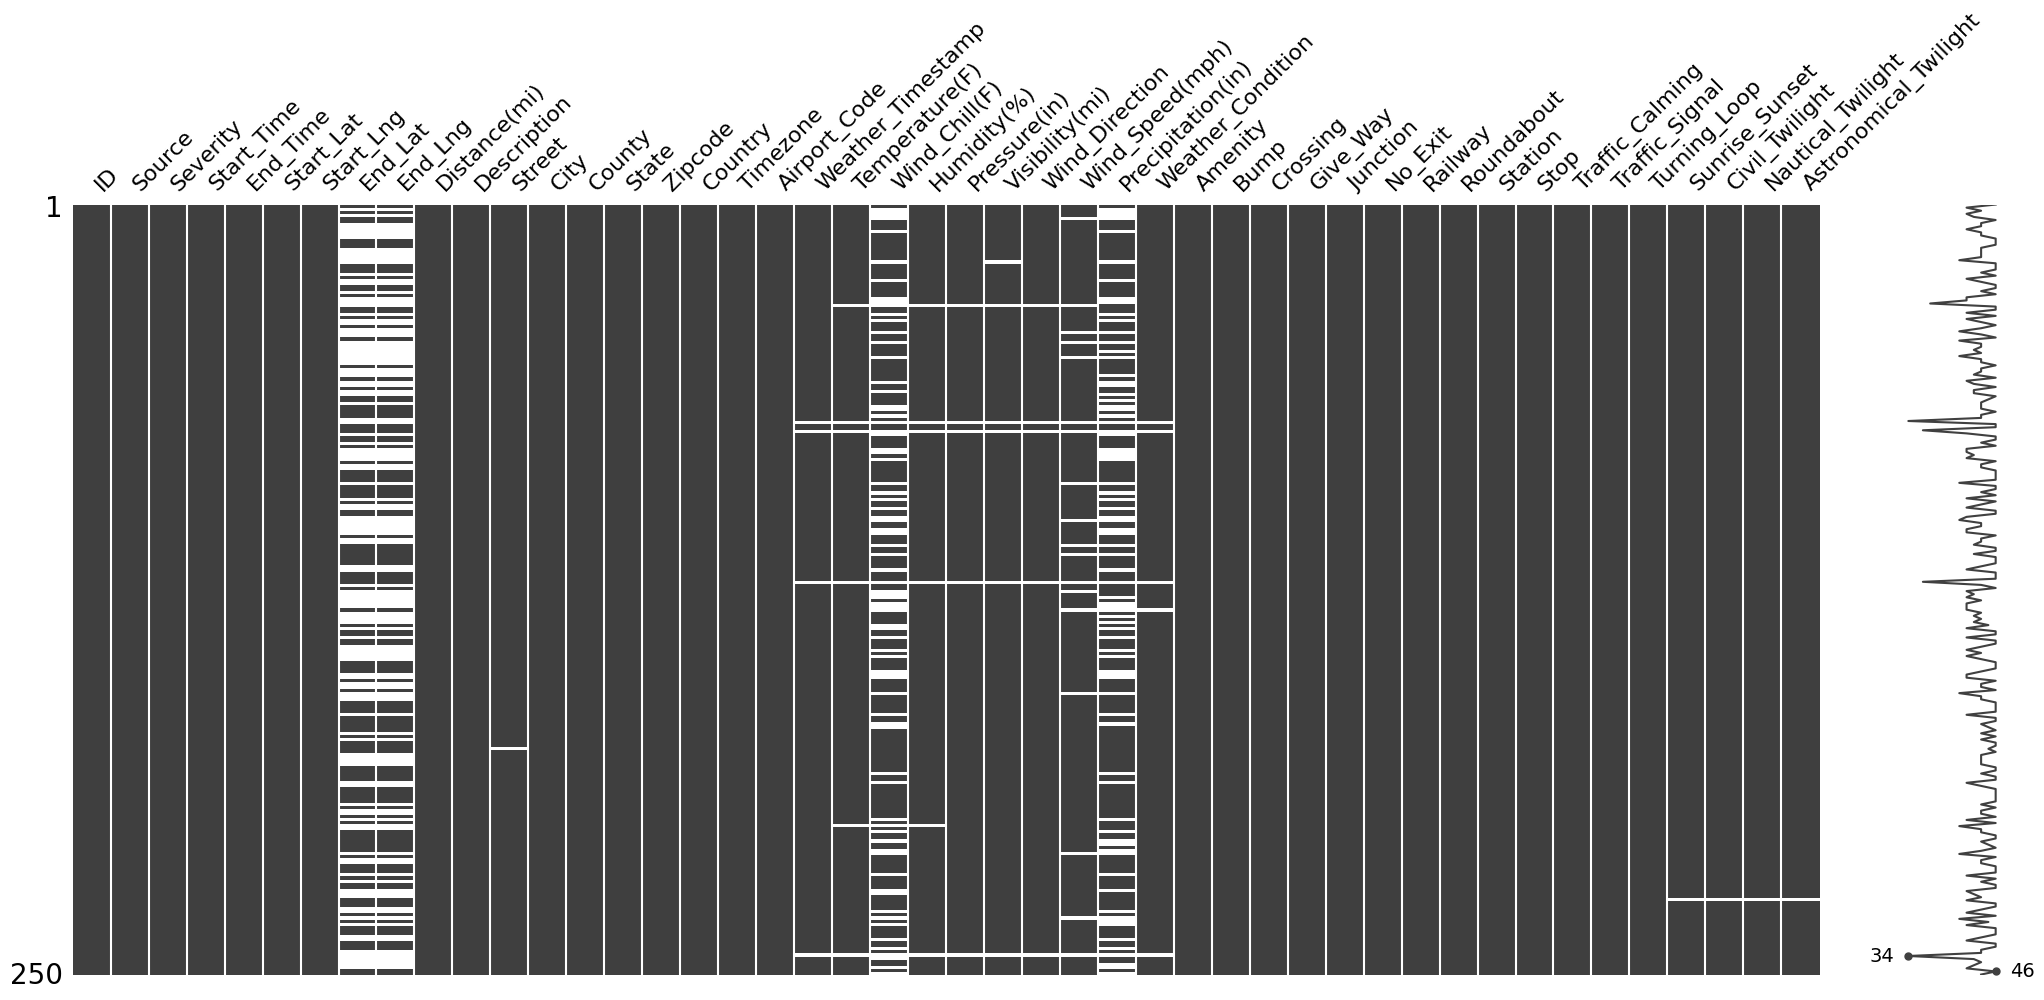

In [ ]:
#Visualising Missing Values
import missingno as msno
msno.matrix(US_Accidents.sample(250))

In [ ]:
# see what columns have missing data
US_Accidents.isnull().sum().sort_values(ascending=False)

End_Lat                  2393
End_Lng                  2393
Precipitation(in)        1561
Wind_Chill(F)            1433
Wind_Speed(mph)           379
Humidity(%)               118
Weather_Condition         113
Wind_Direction            112
Visibility(mi)            111
Temperature(F)            111
Pressure(in)               89
Weather_Timestamp          80
Airport_Code               19
Nautical_Twilight          15
Civil_Twilight             15
Sunrise_Sunset             15
Astronomical_Twilight      15
Street                     11
Timezone                    7
Country                     1
Turning_Loop                1
Traffic_Signal              1
Traffic_Calming             1
Stop                        1
Station                     1
Roundabout                  1
Railway                     1
No_Exit                     1
Junction                    1
Give_Way                    1
Crossing                    1
Bump                        1
Amenity                     1
City      

In [ ]:
# see are the missing value by Percentage
missing_percentage = US_Accidents.isnull().sum().sort_values(ascending=False)/len(US_Accidents)*100
missing_percentage

End_Lat                  44.879970
End_Lng                  44.879970
Precipitation(in)        29.276069
Wind_Chill(F)            26.875469
Wind_Speed(mph)           7.108027
Humidity(%)               2.213053
Weather_Condition         2.119280
Wind_Direction            2.100525
Visibility(mi)            2.081770
Temperature(F)            2.081770
Pressure(in)              1.669167
Weather_Timestamp         1.500375
Airport_Code              0.356339
Nautical_Twilight         0.281320
Civil_Twilight            0.281320
Sunrise_Sunset            0.281320
Astronomical_Twilight     0.281320
Street                    0.206302
Timezone                  0.131283
Country                   0.018755
Turning_Loop              0.018755
Traffic_Signal            0.018755
Traffic_Calming           0.018755
Stop                      0.018755
Station                   0.018755
Roundabout                0.018755
Railway                   0.018755
No_Exit                   0.018755
Junction            

In [ ]:
# Dropping columns with more than 25% missing percentage
columns_to_drop = missing_percentage[missing_percentage > 25].index
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [ ]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['ID','Source', 'Description', 'Start_Lat', 'Start_Lng', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# Drop the columns
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

# Drop rows with null values in any column
US_Accidents = US_Accidents.dropna()

print(US_Accidents.head())

   Severity                     Start_Time                       End_Time  \
0         2            2019-06-12 10:10:56            2019-06-12 10:55:58   
1         2  2022-12-03 23:37:14.000000000  2022-12-04 01:56:53.000000000   
2         2  2022-08-20 13:13:00.000000000  2022-08-20 15:22:45.000000000   
3         2            2022-02-21 17:43:04            2022-02-21 19:43:23   
4         2            2020-12-04 01:46:00            2020-12-04 04:13:09   

   Distance(mi)            Street         City State Country  \
0         0.000        Highway 19      Zachary    LA      US   
1         0.056   Forest Ridge Dr     Sterling    VA      US   
2         0.022     Floradale Ave       Lompoc    CA      US   
3         1.054        14th St NW       Austin    MN      US   
4         0.046        River Blvd  Bakersfield    CA      US   

     Weather_Timestamp  Temperature(F)  ...  Junction  No_Exit  Railway  \
0  2019-06-12 09:53:00            77.0  ...     False    False    False   
1 

### Exploratory Analysis and Visualization

In this section, various perspectives are explored. Data analysis includes location-based examination, date-related insights, study of atmospheric factors' impact, and analysis based on traffic characteristics

### Analysis By Location

This section initially examines the cities and states with the highest accident rates. Following that, a detailed analysis is conducted on the top three states with the most accidents. The primary cities are identified, along with their percentage relative to the rest of the state.

In [ ]:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
City
Miami            123
Los Angeles       99
Charlotte         98
Houston           89
Orlando           80
Dallas            78
Austin            69
Raleigh           58
Sacramento        55
Nashville         54
Phoenix           49
Baton Rouge       49
Minneapolis       46
Atlanta           42
San Diego         37
Oklahoma City     35
Columbia          30
Saint Paul        29
San Antonio       28
Rochester         27
Name: count, dtype: int64


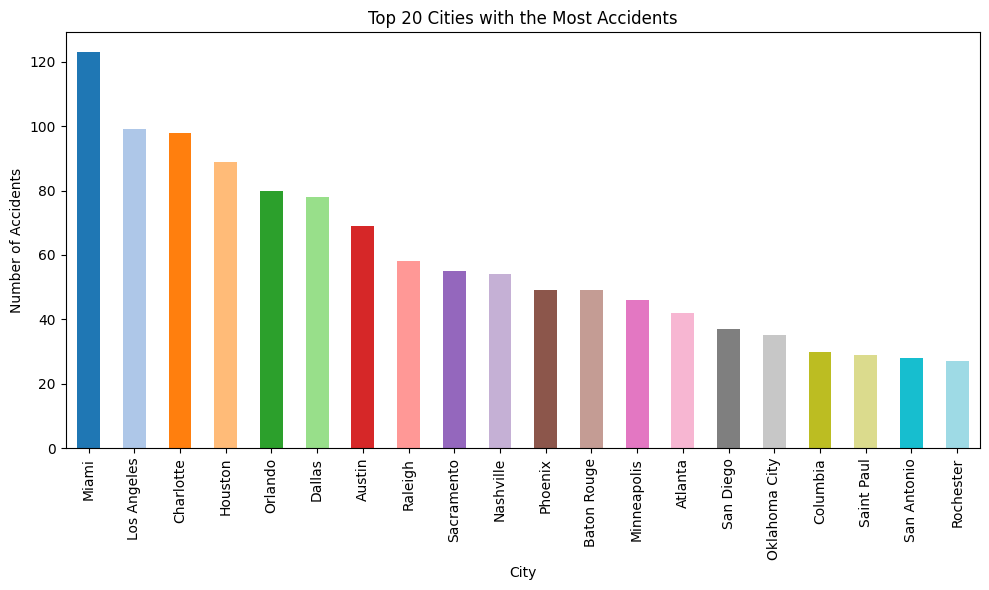

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [ ]:
# Get the top 20 Stateswith the most accidents
accidents_by_state = US_Accidents['State'].value_counts()

top_20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top_20_states)

Top 20 States with the Most Accidents:
State
CA    1088
FL     559
TX     357
SC     237
NY     218
NC     217
VA     171
PA     171
MN     151
OR     118
MI     117
AZ     117
GA     117
TN     109
IL     108
LA      99
NJ      74
WA      70
MD      67
AL      67
Name: count, dtype: int64


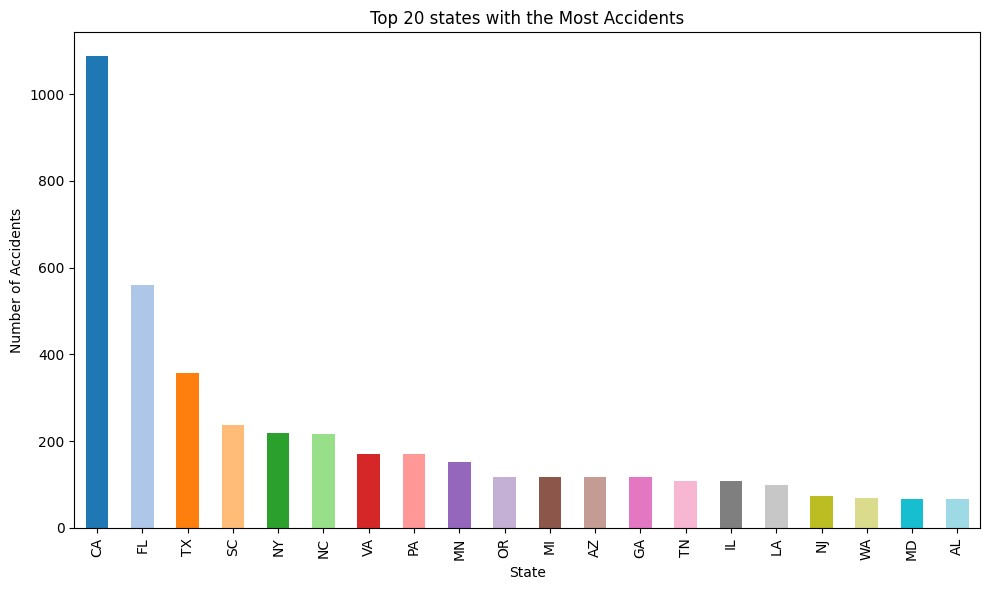

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
top_20_states.plot(kind='bar',color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 states with the Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [ ]:
#Filtering the Accidents in California By City
accidents_california = US_Accidents[US_Accidents['State'] == 'CA']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_california = accidents_california['City'].value_counts().head(5)

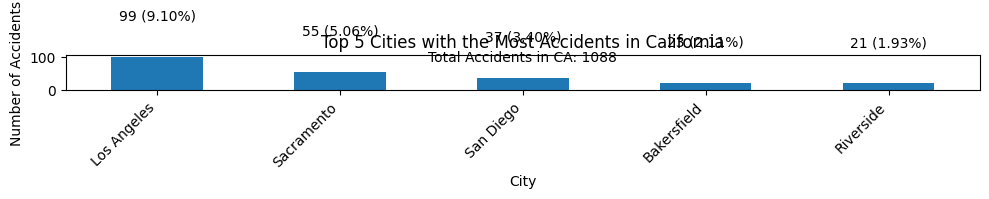

In [ ]:
# Calculate the total percentage of accidents in California
total_accidents_california = len(accidents_california)
percentage_california = total_accidents_california / len(US_Accidents) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_california.plot(kind='bar', color='#1F77B4')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in California')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_california):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_california * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in CA: {total_accidents_california}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [ ]:
#Filtering the Accidents in Florida By City
accidents_florida = US_Accidents[US_Accidents['State'] == 'FL']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_florida = accidents_florida['City'].value_counts().head(5)

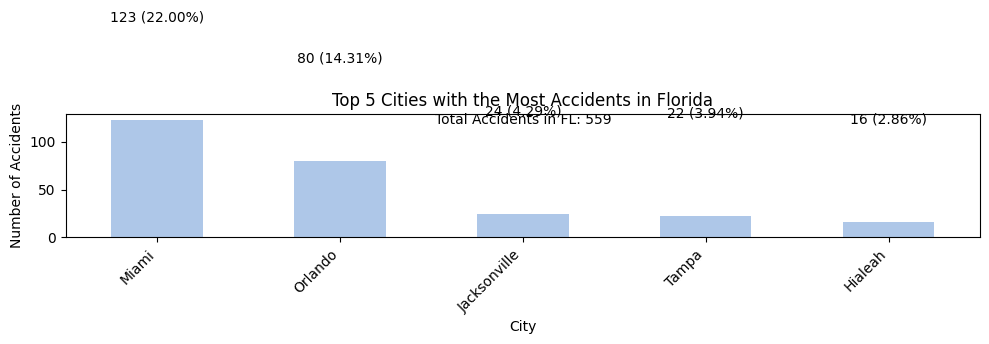

In [ ]:
# Calculate the total percentage of accidents in florida
total_accidents_florida = len(accidents_florida)
percentage_florida = total_accidents_florida / len(US_Accidents) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_florida.plot(kind='bar', color='#AEC7E8')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in Florida')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_florida):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_florida * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_florida}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [ ]:
#Filtering the Accidents in Texas By City
accidents_texas = US_Accidents[US_Accidents['State'] == 'TX']

#Filtering the top 5 cities in Texas with most Accidents
accidents_by_city_texas = accidents_texas['City'].value_counts().head(5)

<ipython-input-21-1ac7e82b5743>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


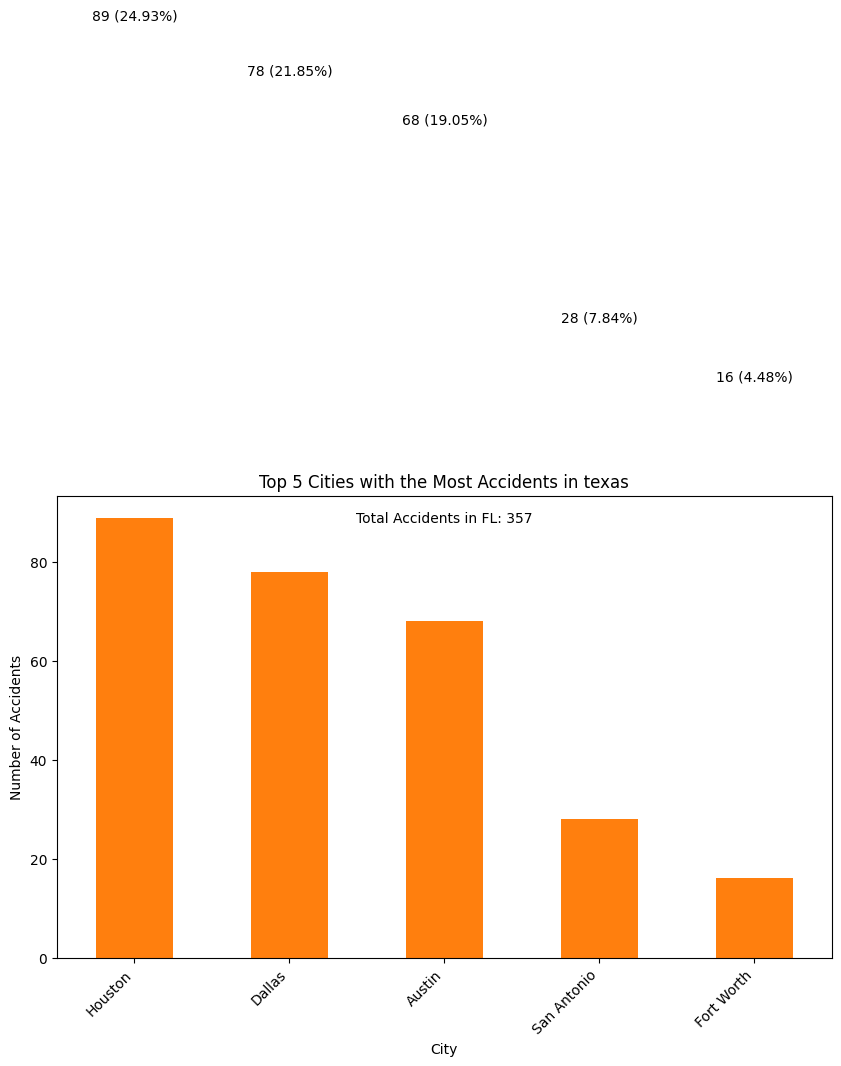

In [ ]:
# Calculate the total percentage of accidents in texas
total_accidents_texas = len(accidents_texas)
percentage_texas= total_accidents_texas / len(US_Accidents) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_texas.plot(kind='bar', color='#FF7F0E')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in texas')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_texas):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_texas * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_texas}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

### Analysis by Date

In this section, the data is disaggregated based on the 'Start_Time' column, examining the frequency and percentage of accidents by year, day of the week, and time. Additionally, the analysis distinguishes between weekdays and weekends due to their distinct patterns of behavior

In [ ]:
#Changing the Time Format
print(US_Accidents['Start_Time'].head())

0              2019-06-12 10:10:56
1    2022-12-03 23:37:14.000000000
2    2022-08-20 13:13:00.000000000
3              2022-02-21 17:43:04
4              2020-12-04 01:46:00
Name: Start_Time, dtype: object


In [ ]:
# Convert the 'Start_Time' column to datetime object
US_Accidents.Start_Time = pd.to_datetime(US_Accidents.Start_Time, errors='coerce')

year = US_Accidents['Start_Time'].dt.year
month = US_Accidents['Start_Time'].dt.month
dayofweek = US_Accidents['Start_Time'].dt.dayofweek
hour = US_Accidents['Start_Time'].dt.hour
weekday_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek < 5]['Start_Time'].dt.hour
weekend_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek >= 5]['Start_Time'].dt.hour


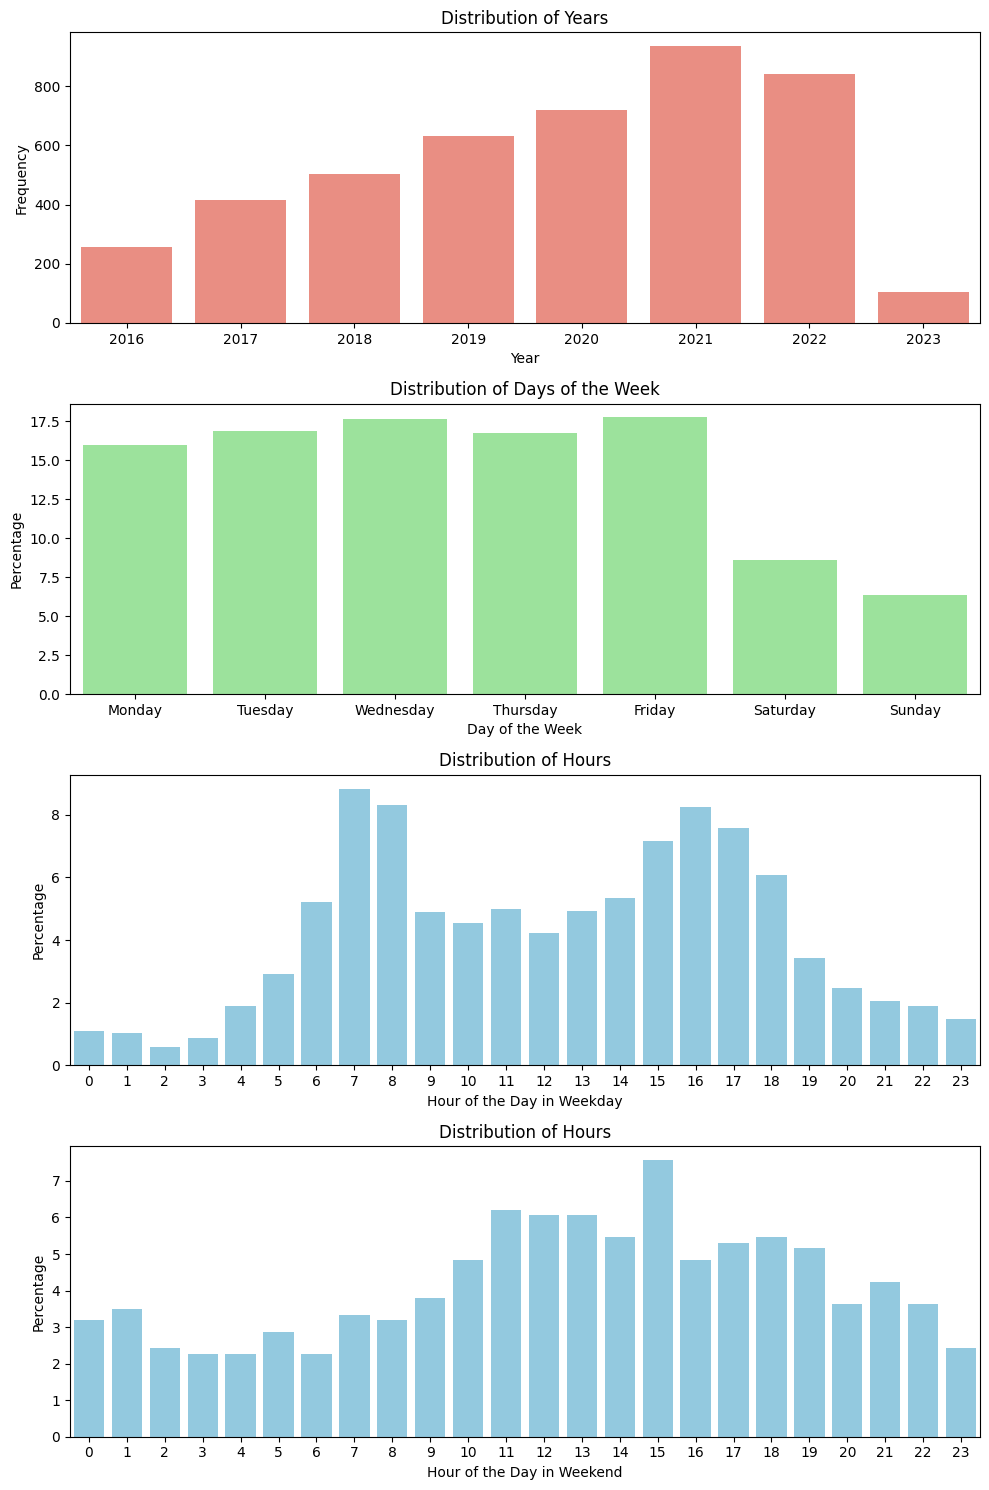

In [ ]:
# Create histograms for hours, years, and days of the week
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

# Histogram for years
year_frequency = (year.value_counts()).sort_index()
sns.barplot(x=year_frequency.index.astype(int), y=year_frequency.values, ax=axes[0], color='salmon')
axes[0].set_title('Distribution of Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Histogram for days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_percentage = (dayofweek.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=day_percentage.index, y=day_percentage.values, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Days of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(days)


# Histogram for Hours in Weekdays
hour_percentage = (weekday_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of Hours')
axes[2].set_xlabel('Hour of the Day in Weekday')
axes[2].set_ylabel('Percentage')

# Histogram for Hours in Weekends
hour_percentage = (weekend_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[3], color='skyblue')
axes[3].set_title('Distribution of Hours')
axes[3].set_xlabel('Hour of the Day in Weekend')
axes[3].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Analysis by Weather

This chapter aims to discern the impact of weather conditions on accident occurrences by examining factors such as temperature, humidity, and wind speed. These factors are juxtaposed with annual average values to highlight deviations from the norm. The analysis focuses on the top three states with the highest accident rates. Finally, a bar graph is presented to visualize the distribution of climate conditions.

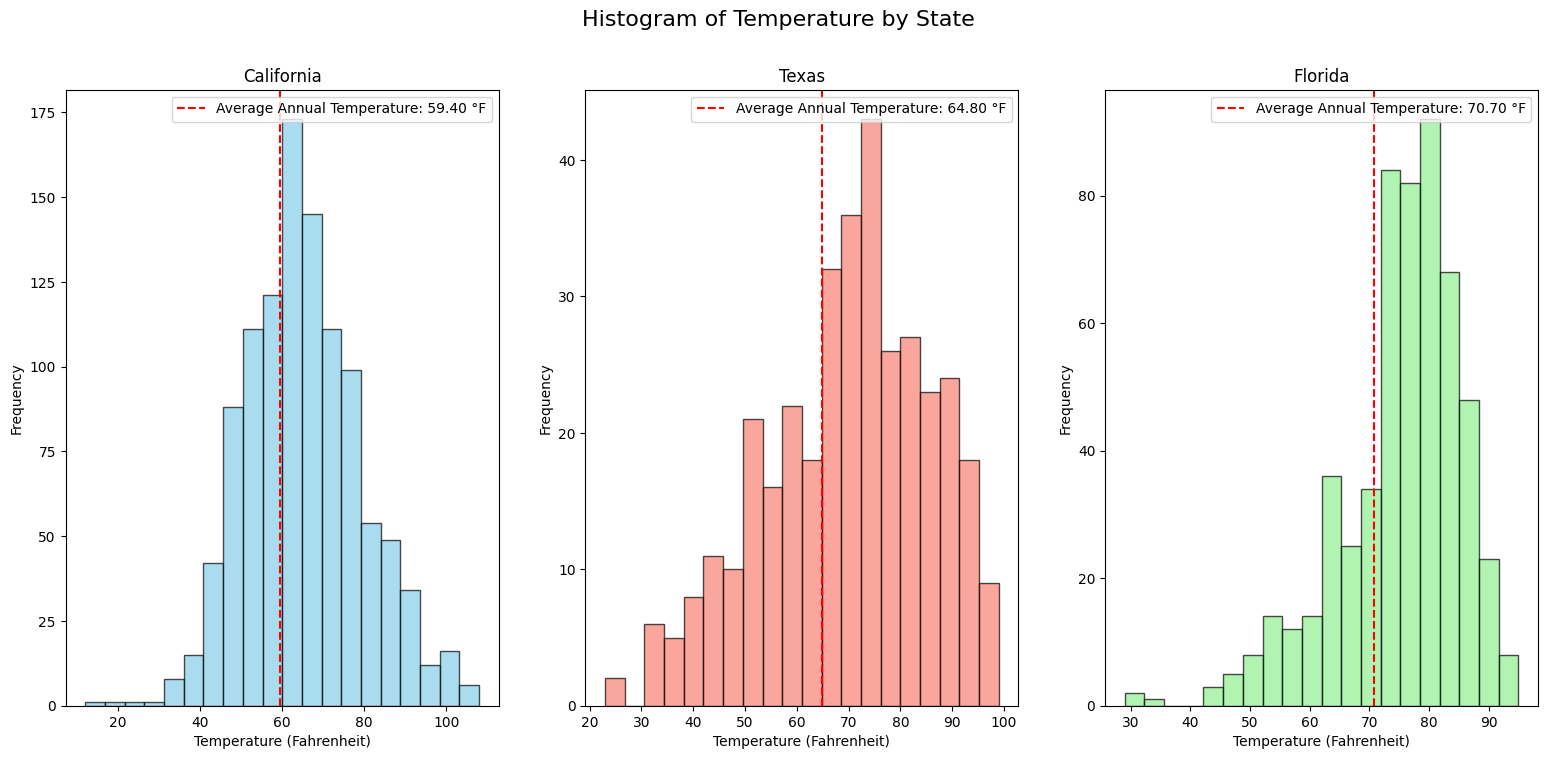

In [ ]:
# Filter data for California, Texas, and Florida
california_data = US_Accidents[US_Accidents['State'] == 'CA']['Temperature(F)'].dropna()
texas_data = US_Accidents[US_Accidents['State'] == 'TX']['Temperature(F)'].dropna()
florida_data = US_Accidents[US_Accidents['State'] == 'FL']['Temperature(F)'].dropna()

# Calculate mean temperatures for each state
california_mean_temp = 59.4
texas_mean_temp = 64.8
florida_mean_temp = 70.7

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {california_mean_temp:.2f} °F')
axes[0].set_title('California')
axes[0].set_xlabel('Temperature (Fahrenheit)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {texas_mean_temp:.2f} °F')
axes[1].set_title('Texas')
axes[1].set_xlabel('Temperature (Fahrenheit)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {florida_mean_temp:.2f} °F')
axes[2].set_title('Florida')
axes[2].set_xlabel('Temperature (Fahrenheit)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Temperature by State', fontsize=16)

plt.show()

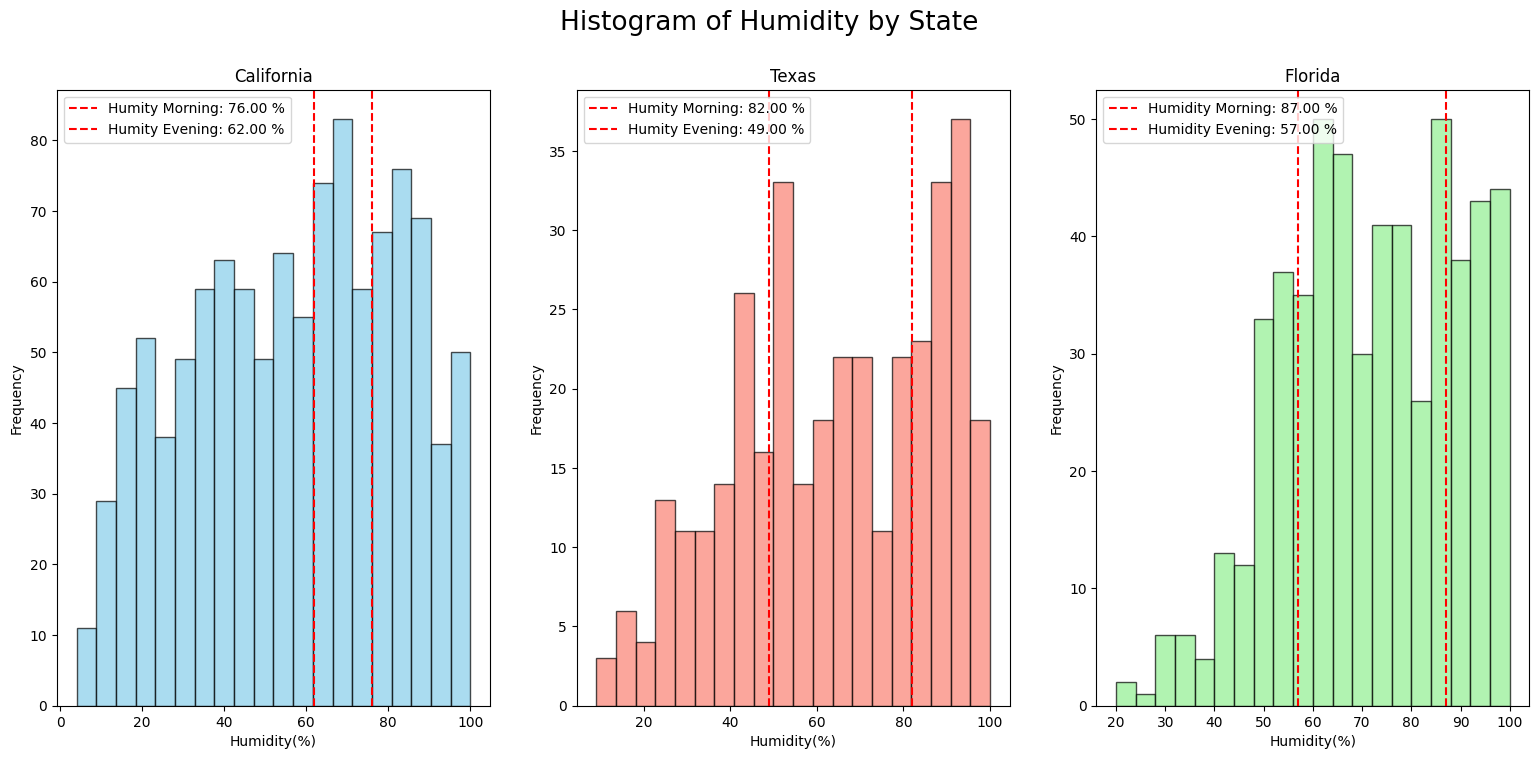

In [ ]:
# Filter data for California, Texas, and Florida
california_data = US_Accidents[US_Accidents['State'] == 'CA']['Humidity(%)'].dropna()
texas_data = US_Accidents[US_Accidents['State'] == 'TX']['Humidity(%)'].dropna()
florida_data = US_Accidents[US_Accidents['State'] == 'FL']['Humidity(%)'].dropna()

# Calculate mean temperatures for each state
california_mean_humity_morning = 76
california_mean_humity_night = 62
texas_mean_humity_morning = 82
texas_mean_humity_night = 49
florida_mean_humity_morning = 87
florida_mean_humity_night = 57

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {california_mean_humity_morning:.2f} %')
axes[0].axvline(california_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {california_mean_humity_night:.2f} %')
axes[0].set_title('California')
axes[0].set_xlabel('Humidity(%)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {texas_mean_humity_morning:.2f} %')
axes[1].axvline(texas_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {texas_mean_humity_night:.2f} %')
axes[1].set_title('Texas')
axes[1].set_xlabel('Humidity(%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Morning: {florida_mean_humity_morning:.2f} %')
axes[2].axvline(florida_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Evening: {florida_mean_humity_night:.2f} %')
axes[2].set_title('Florida')
axes[2].set_xlabel('Humidity(%)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Humidity by State', fontsize=19)

plt.show()

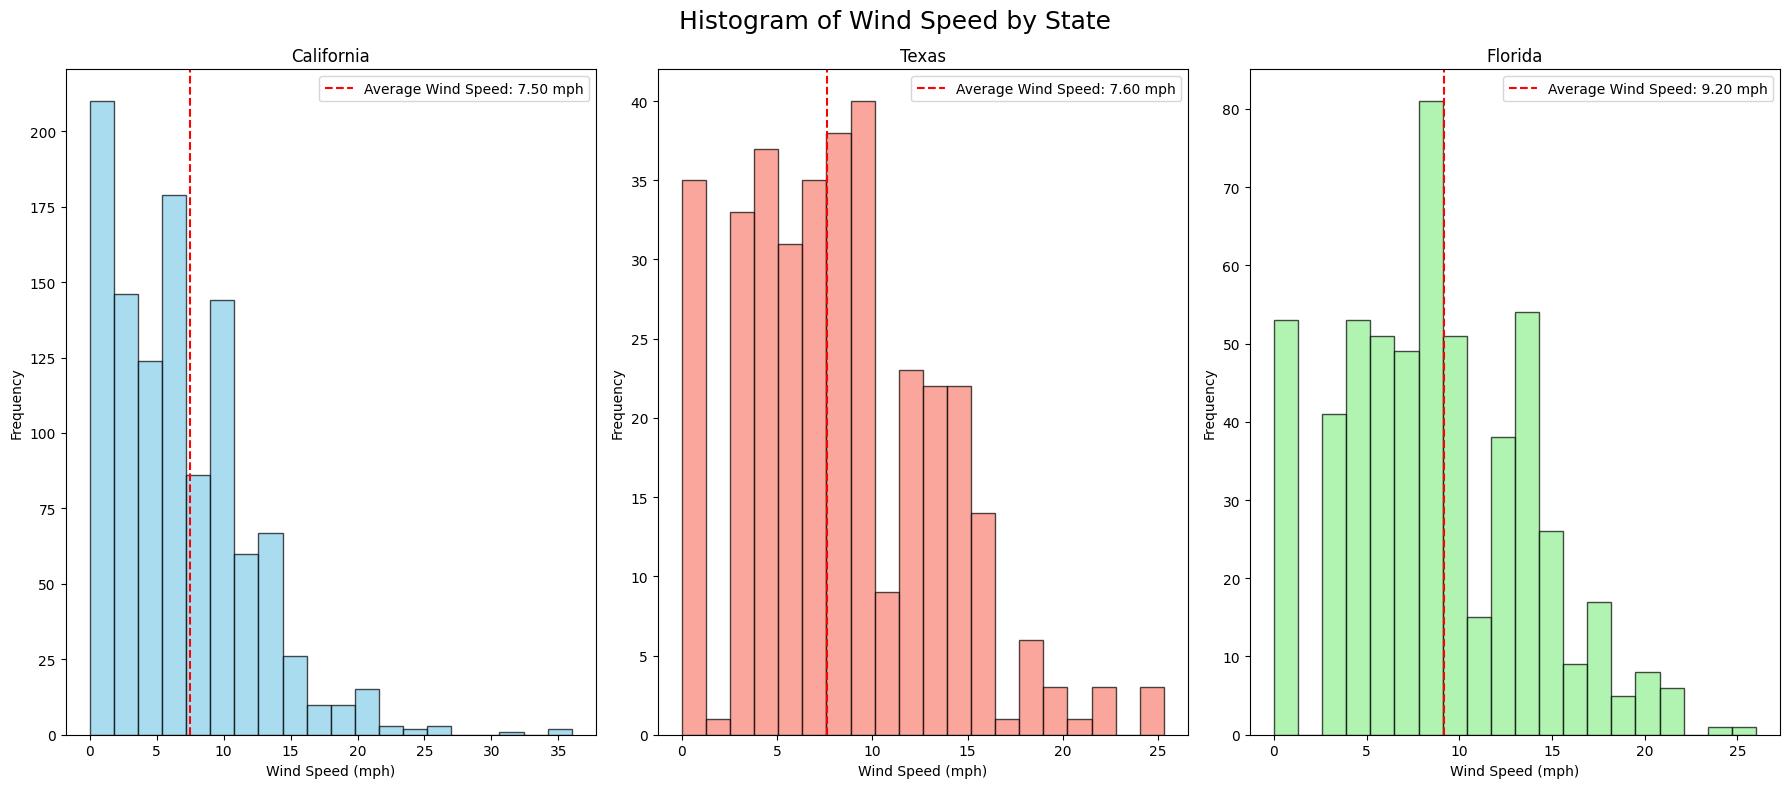

In [ ]:
# Filter data for California, Texas, and Florida
california_data = US_Accidents[US_Accidents['State'] == 'CA']['Wind_Speed(mph)'].dropna()
texas_data = US_Accidents[US_Accidents['State'] == 'TX']['Wind_Speed(mph)'].dropna()
florida_data = US_Accidents[US_Accidents['State'] == 'FL']['Wind_Speed(mph)'].dropna()

# Calculate mean temperatures for each state
california_mean_wind = 7.5
texas_mean_wind = 7.6
florida_mean_wind = 9.2

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {california_mean_wind:.2f} mph')
axes[0].set_title('California')
axes[0].set_xlabel('Wind Speed (mph)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {texas_mean_wind:.2f} mph')
axes[1].set_title('Texas')
axes[1].set_xlabel('Wind Speed (mph)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {florida_mean_wind:.2f} mph')
axes[2].set_title('Florida')
axes[2].set_xlabel('Wind Speed (mph)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Wind Speed by State', fontsize=18)
plt.tight_layout()
plt.show()

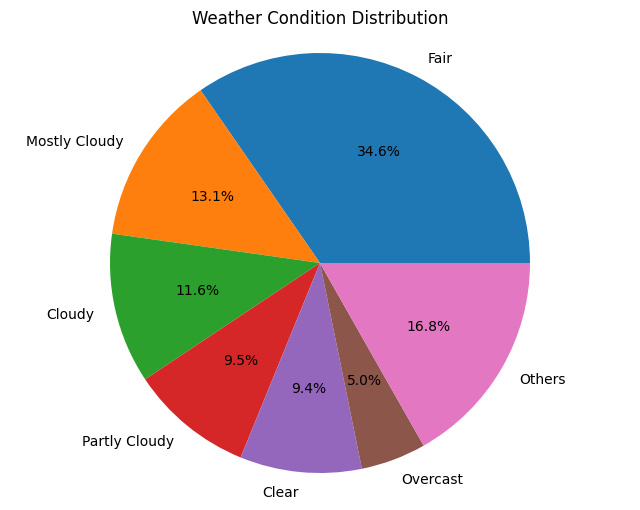

In [ ]:
# Graph the Weather conditions in a Pie Chart
weather_counts = US_Accidents['Weather_Condition'].value_counts()

# Group the main categories of weather conditions
top_conditions = weather_counts.head(6)
other_conditions_count = weather_counts.iloc[6:].sum()

# Create a new DataFrame with the summarized weather conditions
summary_weather_counts = pd.DataFrame(top_conditions).reset_index()
summary_weather_counts.columns = ['Weather_Condition', 'Count']

others_row = pd.DataFrame({'Weather_Condition': ['Others'], 'Count': [other_conditions_count]})
summary_weather_counts = pd.concat([summary_weather_counts, others_row], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary_weather_counts['Count'], labels=summary_weather_counts['Weather_Condition'], autopct='%1.1f%%')
plt.title('Weather Condition Distribution')
plt.axis('equal')
plt.show()

Getting the number of accidents in each city over all years (2016-2023)

In [ ]:
df = US_Accidents
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Miami            123
Los Angeles       99
Charlotte         98
Houston           89
Orlando           80
Dallas            78
Austin            69
Raleigh           58
Sacramento        55
Nashville         54
Phoenix           49
Baton Rouge       49
Minneapolis       46
Atlanta           42
San Diego         37
Oklahoma City     35
Columbia          30
Saint Paul        29
San Antonio       28
Rochester         27
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/content/US_Accidents_March23_sampled_500k.csv')

# Access the 'City' column
City = df['City']

<ipython-input-30-2c314c003c82>:4: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/US_Accidents_March23_sampled_500k.csv')


<Axes: ylabel='City'>

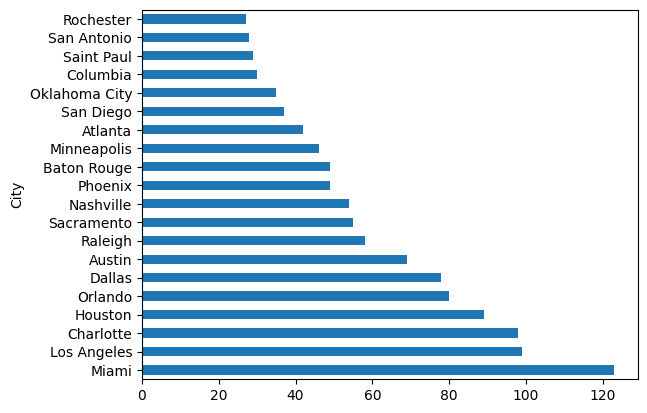

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

Plotting all the citis by number of accidents accidents

<ipython-input-33-1f460903cad6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

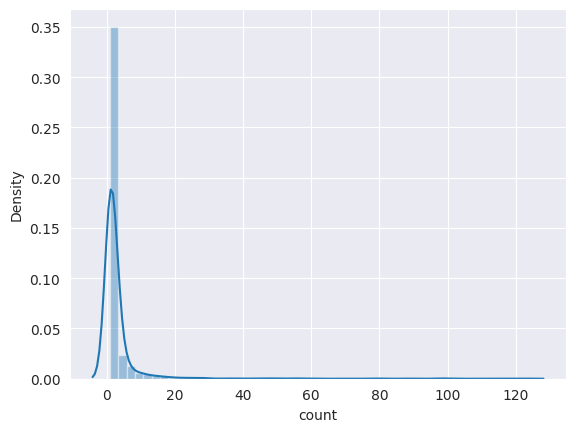

In [ ]:
sns.distplot(cities_by_accident)

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000] # having over 1000 accidents
low_accident_cities = cities_by_accident[cities_by_accident < 1000]  # having less than 1000 accidents

In [ ]:
# Percentage of high accident cities
len(high_accident_cities) / len(cities_by_accident)

0.0

<ipython-input-36-82965915adec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: xlabel='count'>

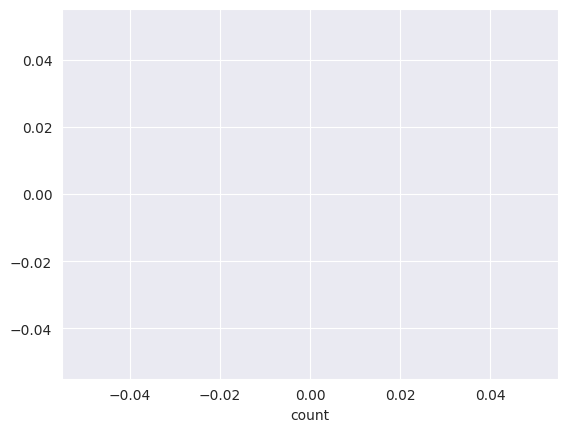

In [ ]:
# Distribution of high accident cities
sns.distplot(high_accident_cities)

<ipython-input-37-44f8e9473711>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<Axes: xlabel='count', ylabel='Density'>

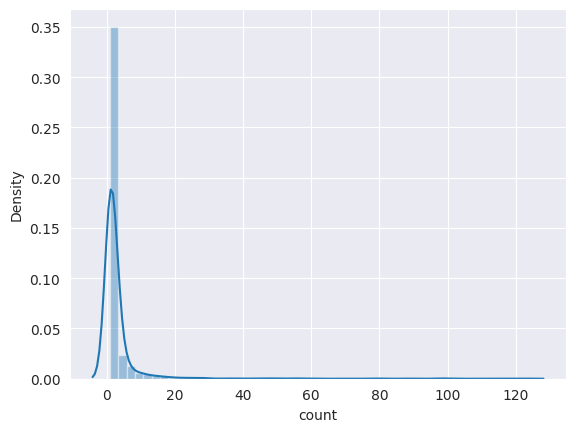

In [ ]:
# Distribution of low accident cities
sns.distplot(low_accident_cities)

<Axes: xlabel='count', ylabel='Count'>

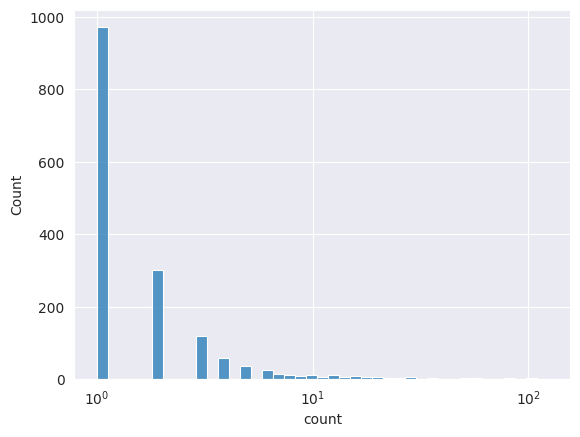

In [ ]:
# Distribution of low accident cities
sns.histplot(low_accident_cities, log_scale=True)

<Axes: >

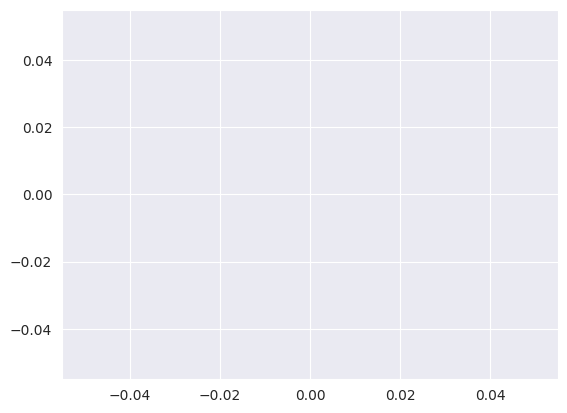

In [ ]:
# Distribution of high accident cities
sns.histplot(high_accident_cities, log_scale=True)

There are alos cities which have reported just 1 accident in 4 years.

This could be an indication of some missing data/ irregularities or the impact of population, per-capitaincome, government spending, average age of city, etc. as hypothesised earlier

In [ ]:
cities_by_accident[cities_by_accident == 1]

City
Rembert              1
Willamina            1
Vicksburg            1
Hudson               1
Hercules             1
                    ..
East Quogue          1
Greenwell Springs    1
Wayzata              1
Ossining             1
Castle Rock          1
Name: count, Length: 972, dtype: int64

In [ ]:
#checking out an entry
df.Start_Time[0]

'2019-06-12 10:10:56'

In [ ]:
df['Start_Time'].head()

0              2019-06-12 10:10:56
1    2022-12-03 23:37:14.000000000
2    2022-08-20 13:13:00.000000000
3              2022-02-21 17:43:04
4              2020-12-04 01:46:00
Name: Start_Time, dtype: object

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

In [ ]:
# converting date time to correct format
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time[0]

Timestamp('2019-06-12 10:10:56')

In [ ]:
# Segregating the different aspects of date-time
df.Start_Time[0].day, df.Start_Time[0].month, df.Start_Time[0].year, df.Start_Time[0].hour, df.Start_Time[0].minute, df.Start_Time[0].second

(12, 6, 2019, 10, 10, 56)

Get the hour of the day for all the data

In [ ]:
df.Start_Time.dt.hour

0        10
1        23
2        13
3        17
4         1
         ..
45229    17
45230     8
45231    10
45232     8
45233     8
Name: Start_Time, Length: 45234, dtype: int32

Plotting the density distribution and count distribution of accidents at each hour of the day

<Axes: xlabel='Start_Time', ylabel='Count'>

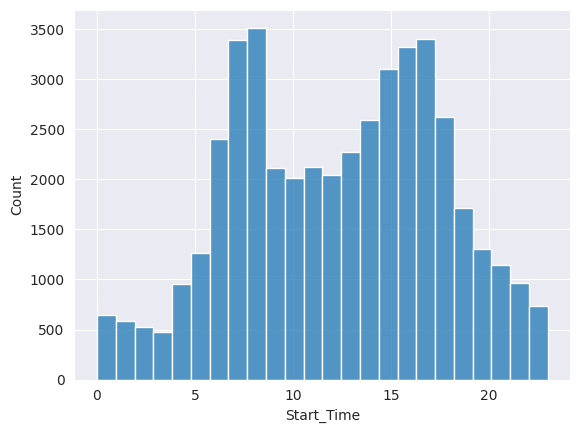

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

<Axes: xlabel='Start_Time', ylabel='Density'>

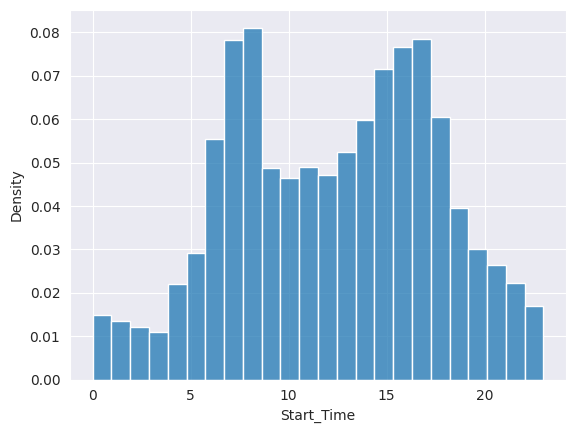

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

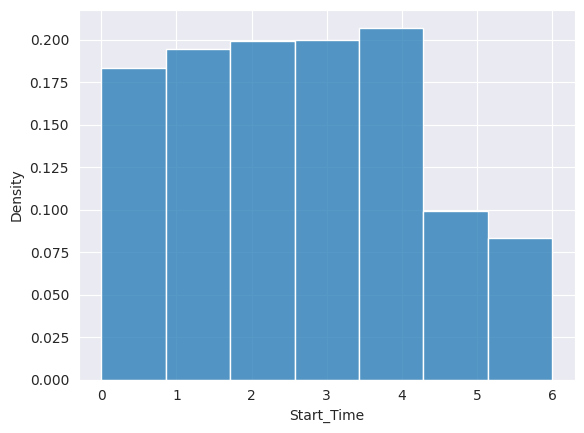

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, stat='density')

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

<Axes: xlabel='Start_Time', ylabel='Density'>

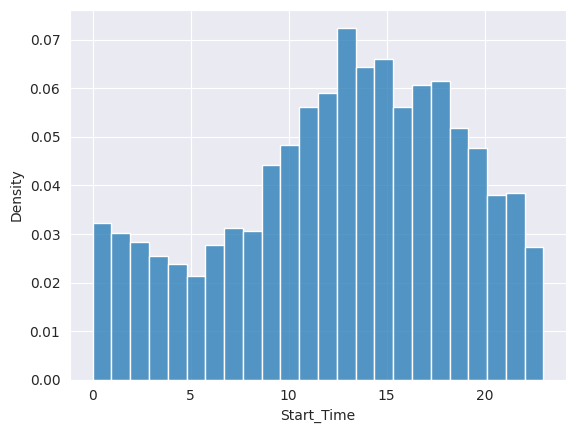

In [ ]:
sns.histplot(sundays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

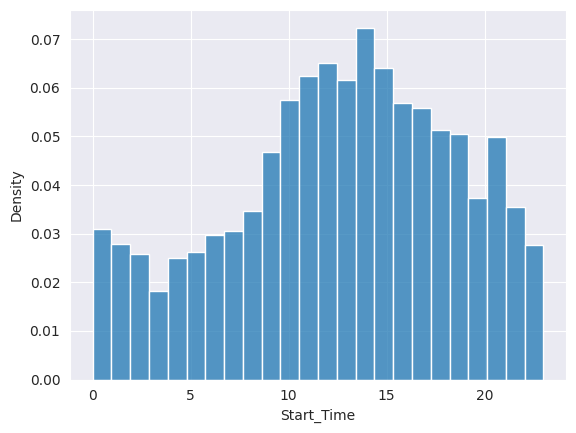

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

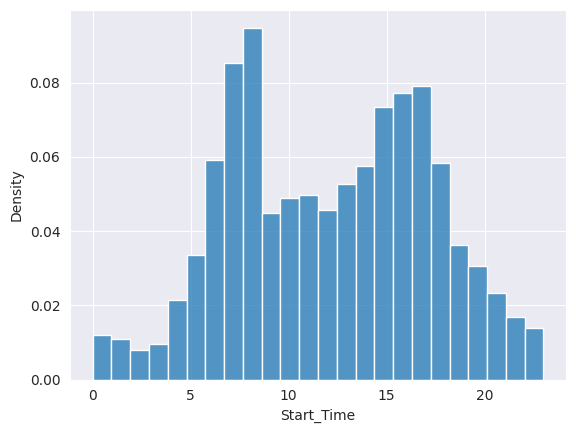

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

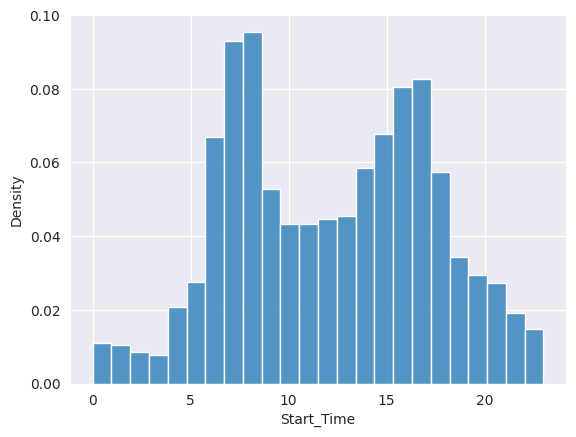

In [ ]:
wednesdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.histplot(wednesdays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

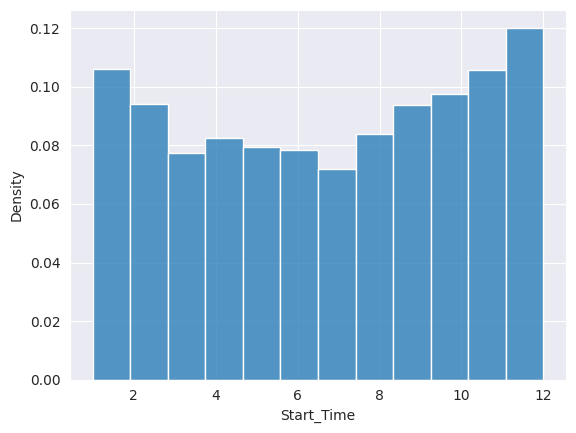

In [ ]:
sns.histplot(df.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

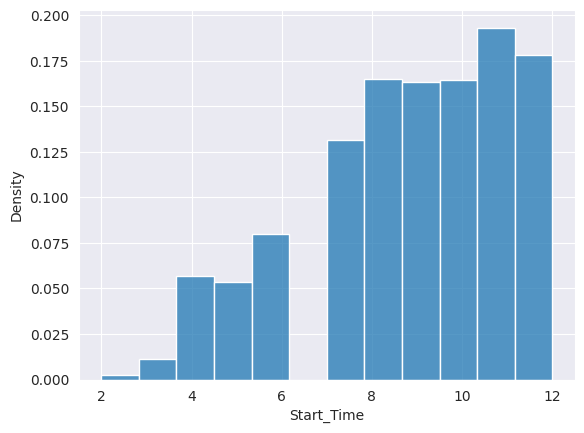

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

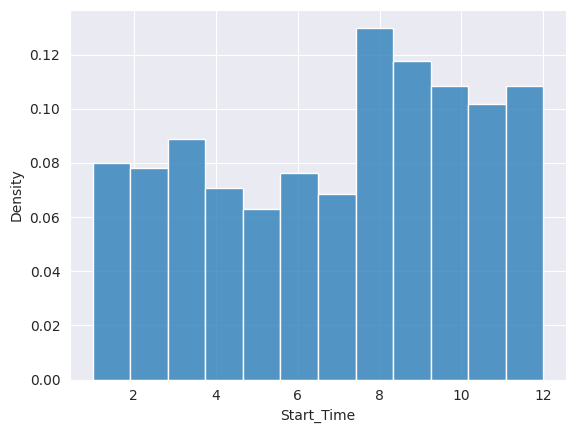

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2017]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

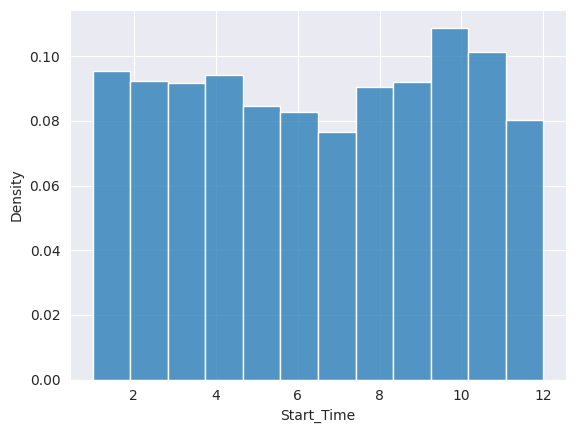

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2018]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

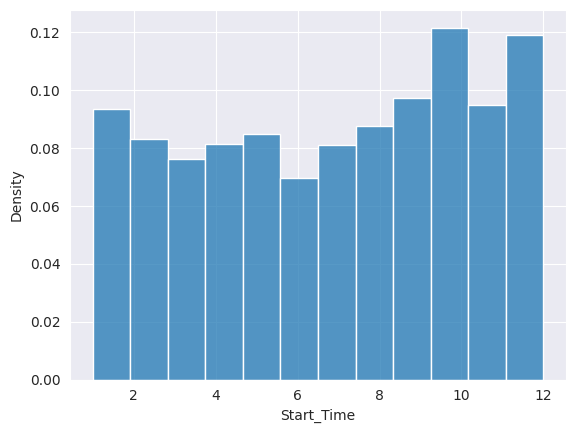

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2019]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

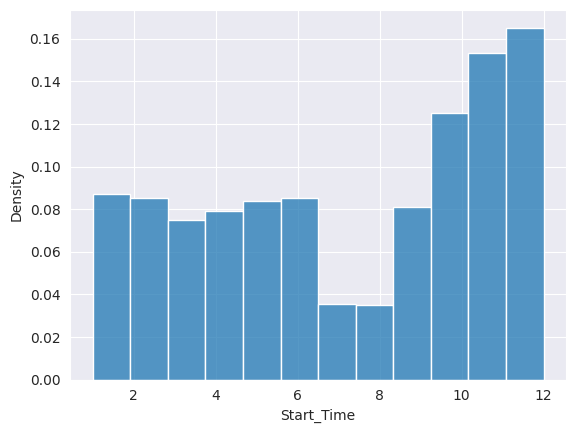

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2020]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

In [ ]:
df.Start_Lat

0        30.641211
1        38.990562
2        34.661189
3        43.680592
4        35.395484
           ...    
45229    40.182831
45230    29.799877
45231    38.906235
45232    39.080074
45233    42.238876
Name: Start_Lat, Length: 45234, dtype: float64

In [ ]:
df.Start_Lng

0        -91.153481
1        -77.399070
2       -120.492822
3        -92.993317
4       -118.985176
            ...    
45229    -74.722939
45230    -95.399162
45231    -76.865547
45232    -94.593384
45233    -83.341545
Name: Start_Lng, Length: 45234, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

Plotting the latitudes and longitudes

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

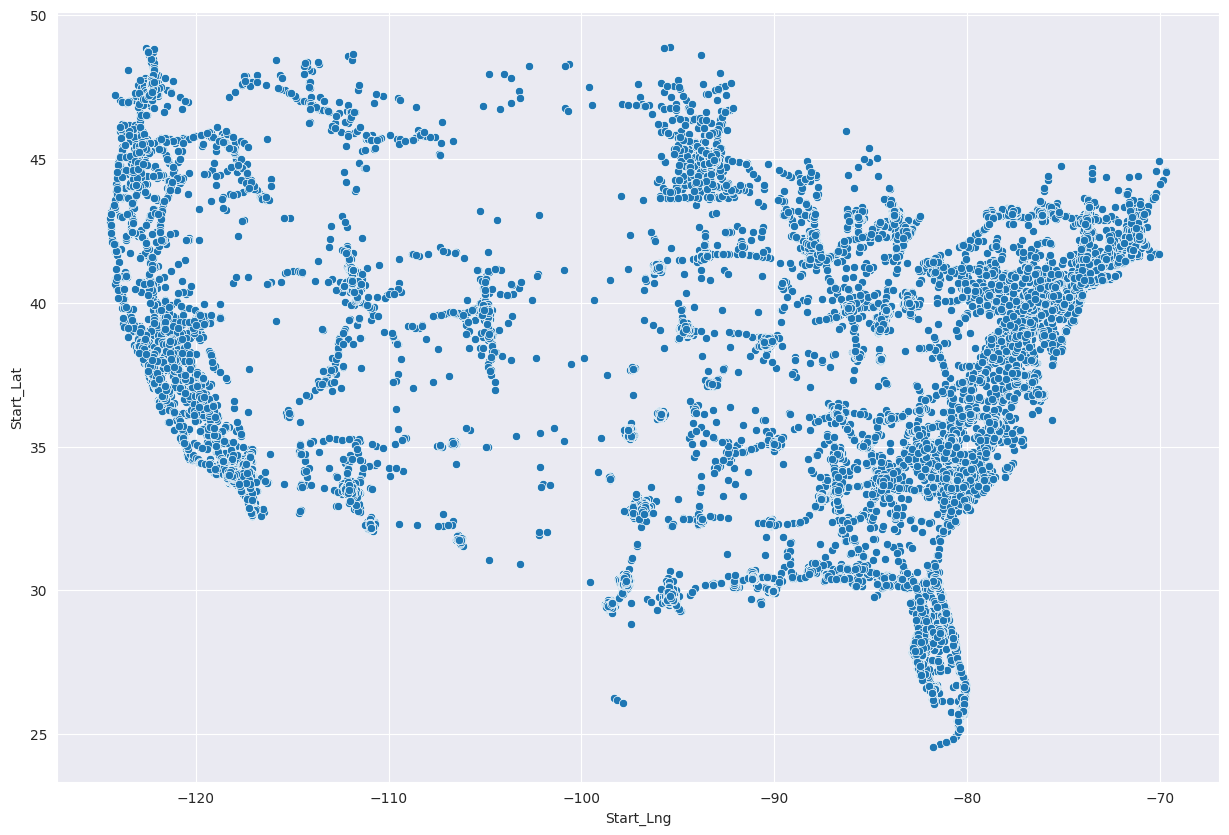

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45234 entries, 0 to 45233
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     45234 non-null  object        
 1   Source                 45234 non-null  object        
 2   Severity               45234 non-null  int64         
 3   Start_Time             45234 non-null  datetime64[ns]
 4   End_Time               45234 non-null  object        
 5   Start_Lat              45234 non-null  float64       
 6   Start_Lng              45234 non-null  float64       
 7   End_Lat                25122 non-null  float64       
 8   End_Lng                25122 non-null  float64       
 9   Distance(mi)           45234 non-null  float64       
 10  Description            45234 non-null  object        
 11  Street                 45173 non-null  object        
 12  City                   45234 non-null  object        
 13  C

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

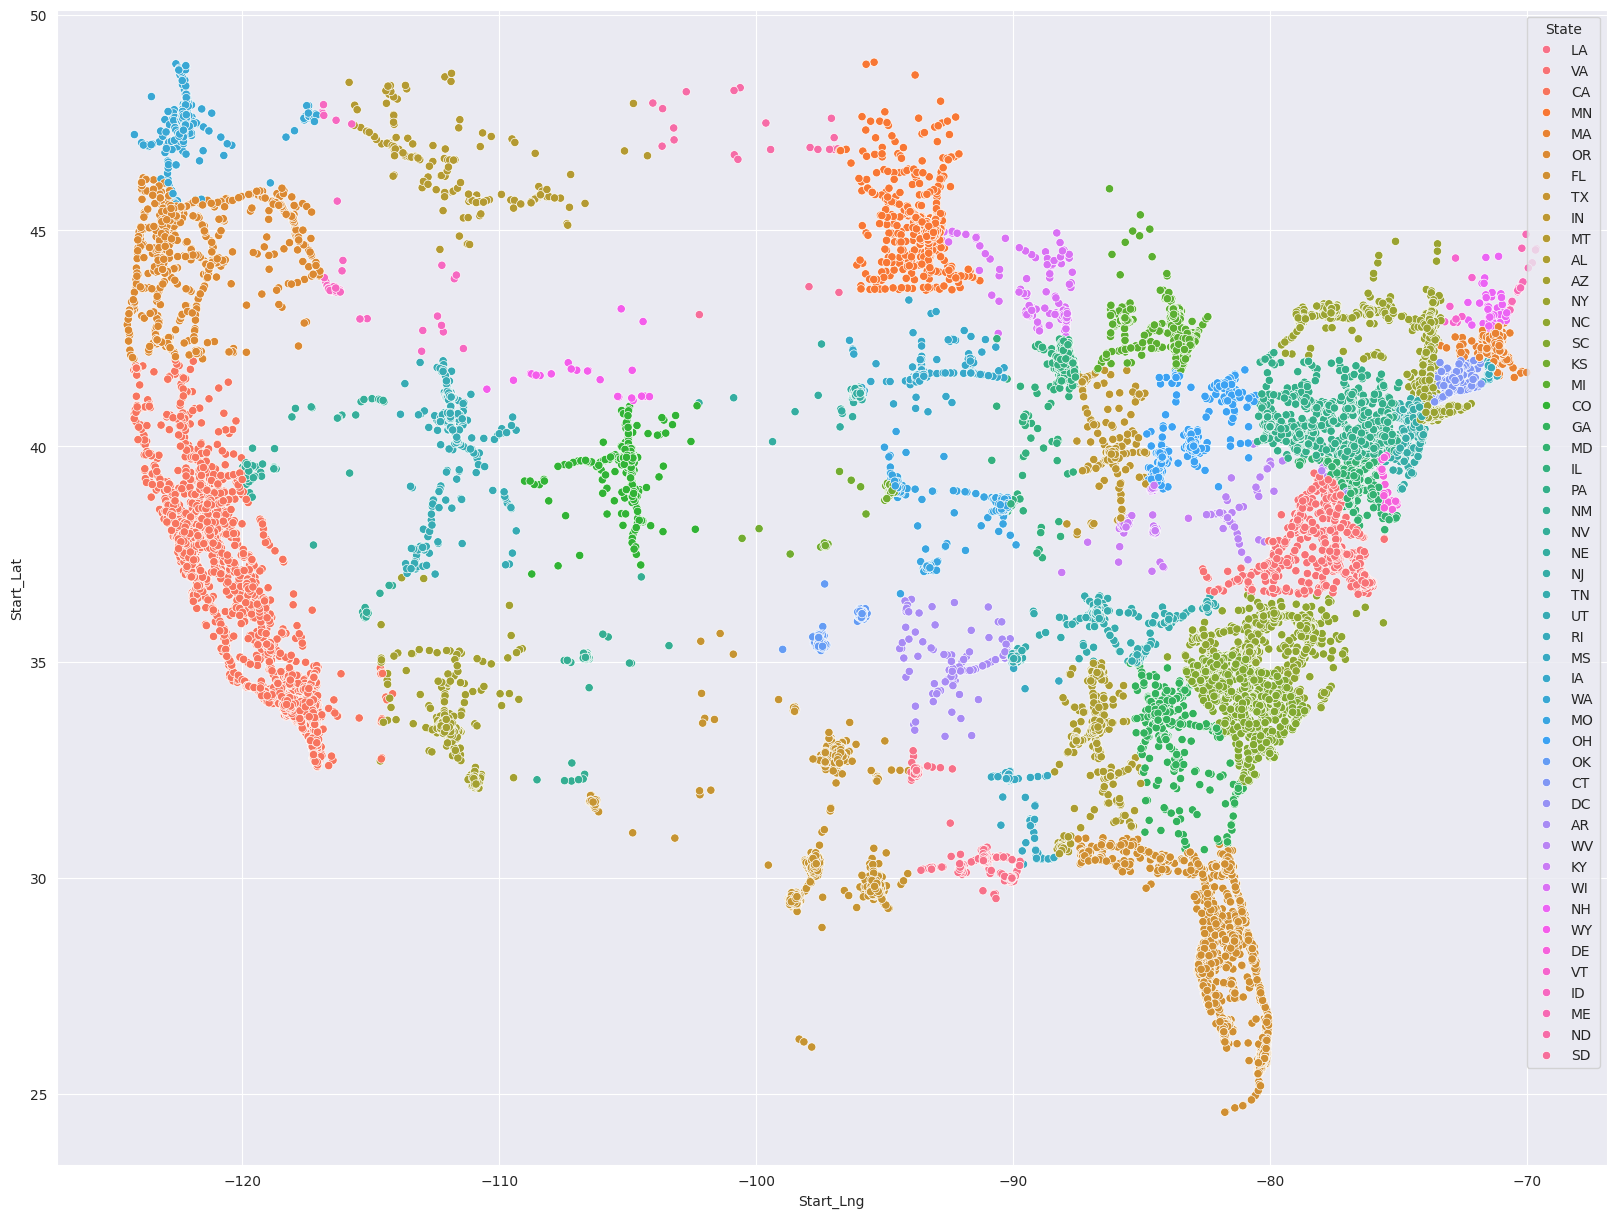

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.State)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

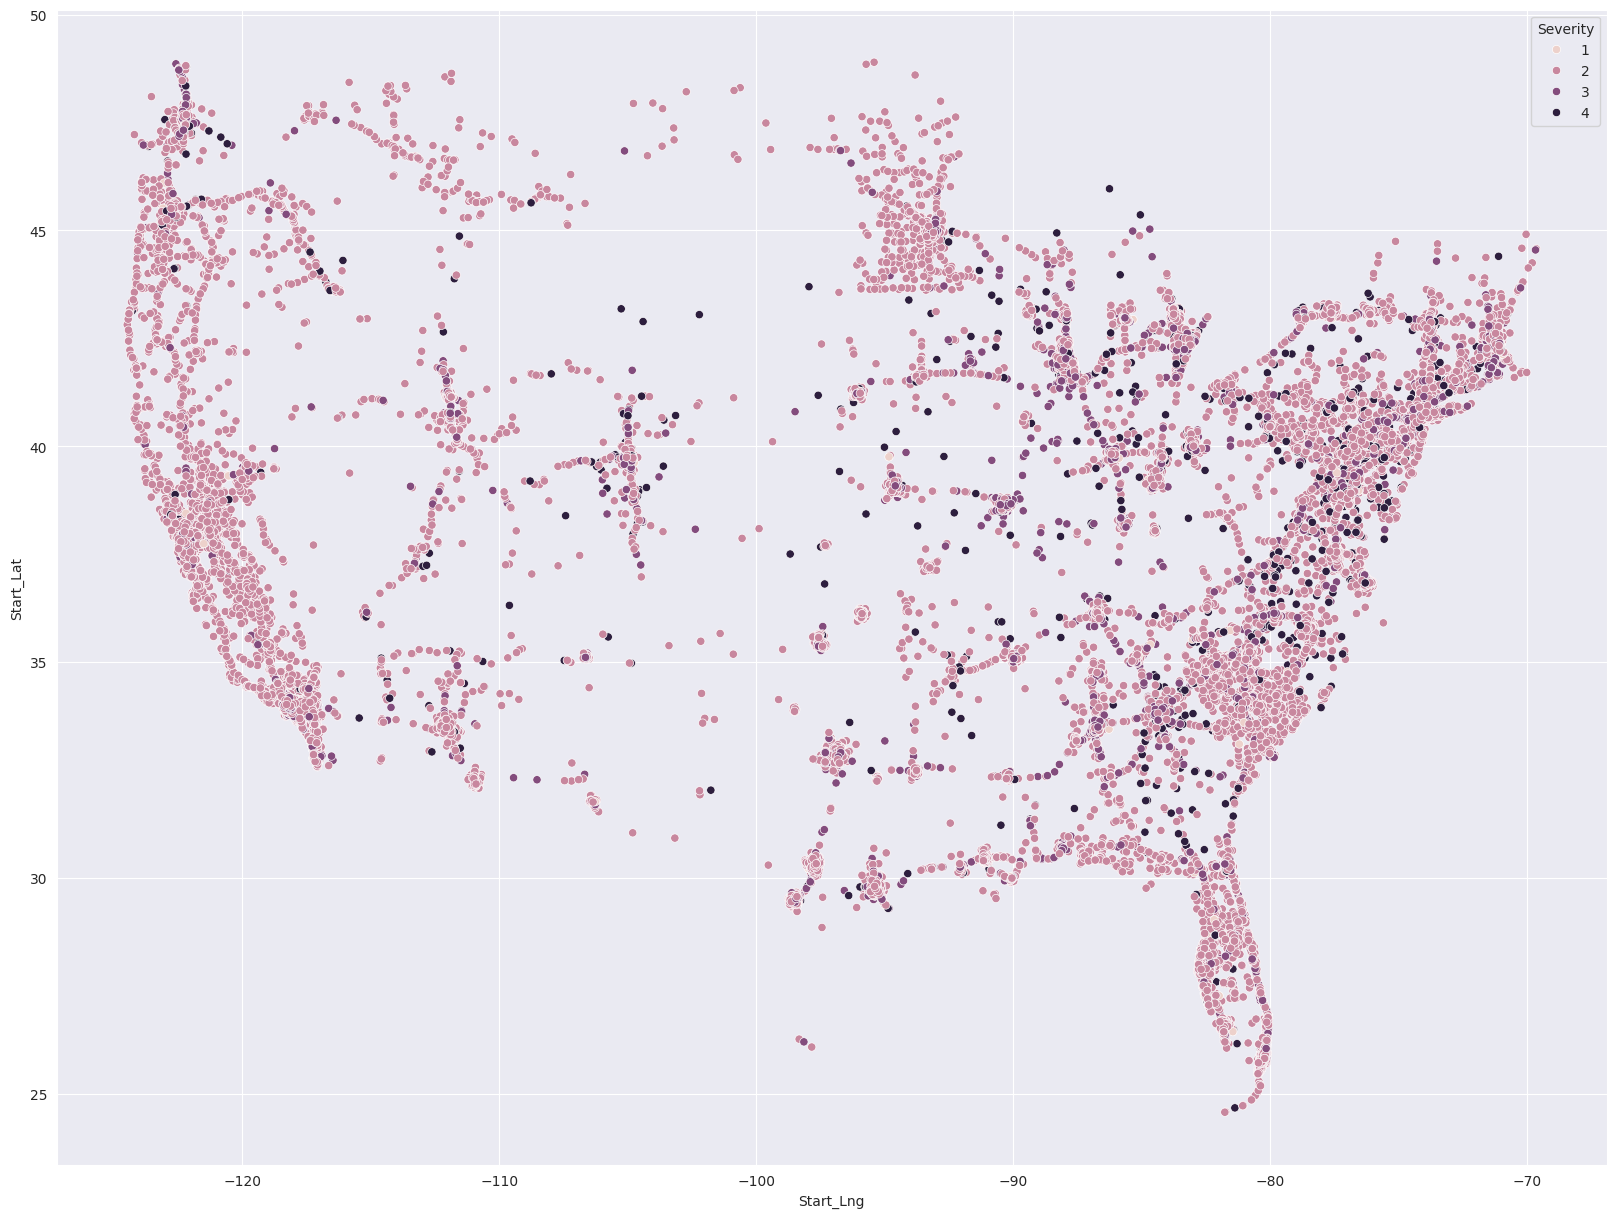

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.Severity)

In [ ]:
df.State.value_counts()[:25]

State
CA    10247
FL     5055
TX     3460
SC     2256
NY     2008
NC     1954
PA     1780
VA     1748
MN     1145
OR     1062
AZ     1011
GA     1011
IL      993
TN      978
MI      961
LA      872
MD      818
NJ      778
OH      681
WA      657
UT      595
AL      578
CO      507
MO      465
OK      432
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7cee27606650>,
 [Text(0.9087228965095804, 0.783723610311211, 'CA'),
  Text(-0.2426747255300658, 1.175205929864595, 'FL'),
  Text(-0.85665084924557, 0.8403269140559785, 'TX'),
  Text(-1.1149347433984276, 0.4437572737016069, 'SC'),
  Text(-1.1959039275185508, 0.09906460591808229, 'NY'),
  Text(-1.1778300016458663, -0.2296007125923146, 'NC'),
  Text(-1.079566513496983, -0.5239619670701001, 'PA'),
  Text(-0.9202168982300192, -0.7701953389964931, 'VA'),
  Text(-0.7479922634206142, -0.9383536507431016, 'MN'),
  Text(-0.5959535703618399, -1.0415562116242099, 'OR'),
  Text(-0.44034808954104254, -1.1162856086313906, 'AZ'),
  Text(-0.27976568806920393, -1.1669323715533668, 'GA'),
  Text(-0.11516837460841396, -1.1944606504569568, 'IL'),
  Text(0.04890845451232553, -1.199002903698409, 'TN'),
  Text(0.20944472307904508, -1.181580681957158, 'MI'),
  Text(0.35776561506137294, -1.1454273284149272, 'LA'),
  Text(0.4894388452415338, -1.095650316829523, 'MD'),
  Text(0.60

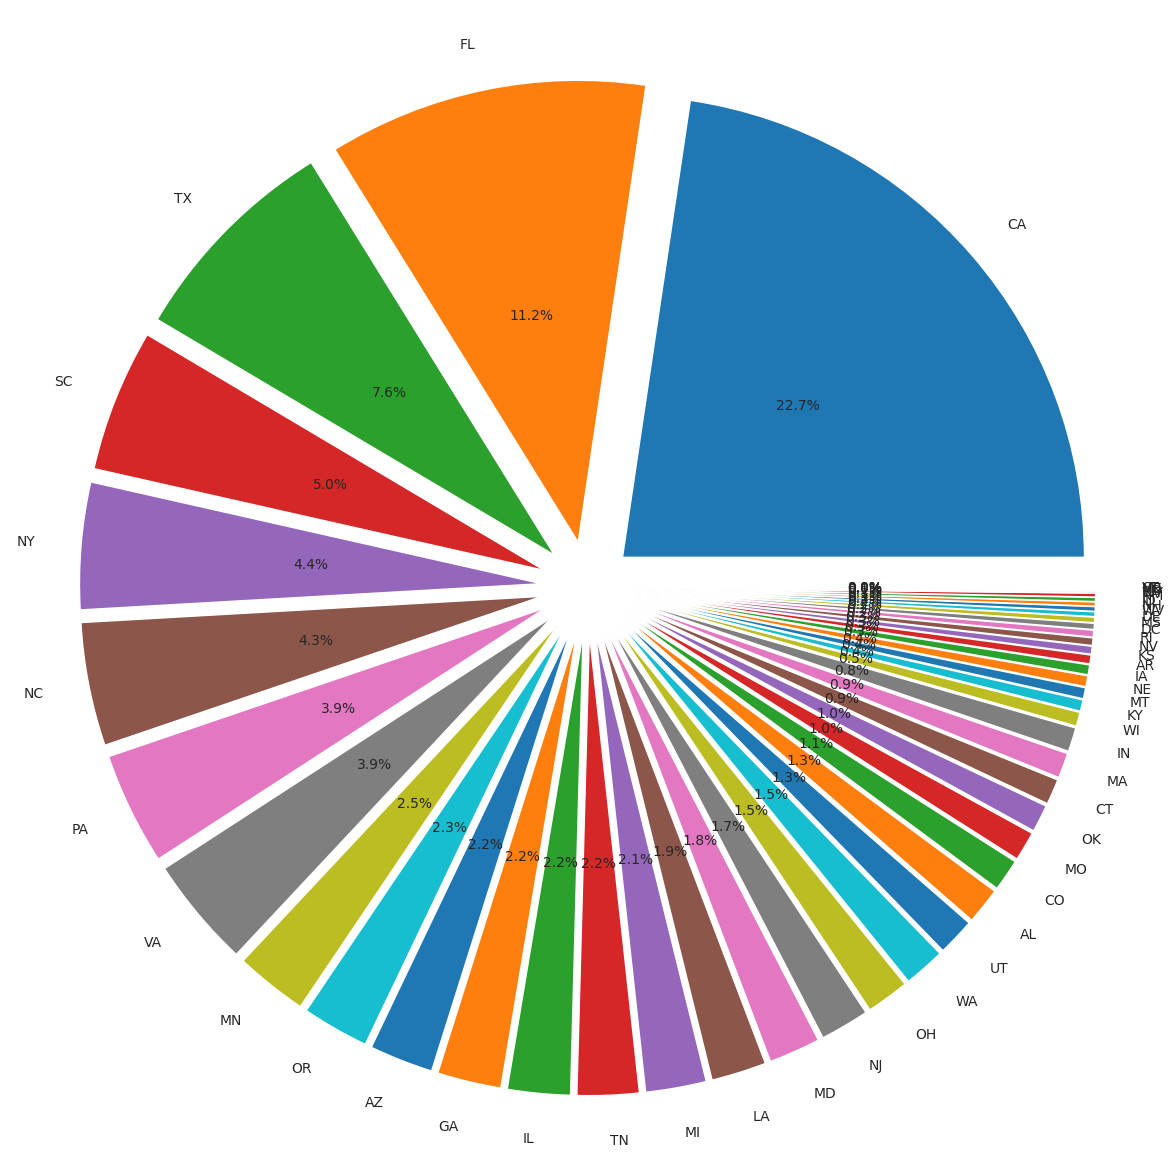

In [ ]:
pie, ax = plt.subplots(figsize=[15, 15])
labels = df.State.value_counts().keys()
plt.pie(x=df.State.value_counts(), autopct="%.1f%%", explode=[0.1]*len(df.State.value_counts()), labels=labels, pctdistance=0.5)

In [ ]:
# Segregating accidents on the basis of severity
severe_accidents_4 = df[df.Severity==4].State.value_counts()
severe_accidents_3 = df[df.Severity==3].State.value_counts()
severe_accidents_2 = df[df.Severity==2].State.value_counts()
severe_accidents_1 = df[df.Severity==1].State.value_counts()

<ipython-input-72-aed47c091cc4>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,2),(0,0))


Text(0.5, 1.0, 'Most Severe Accidents: Severity=4')

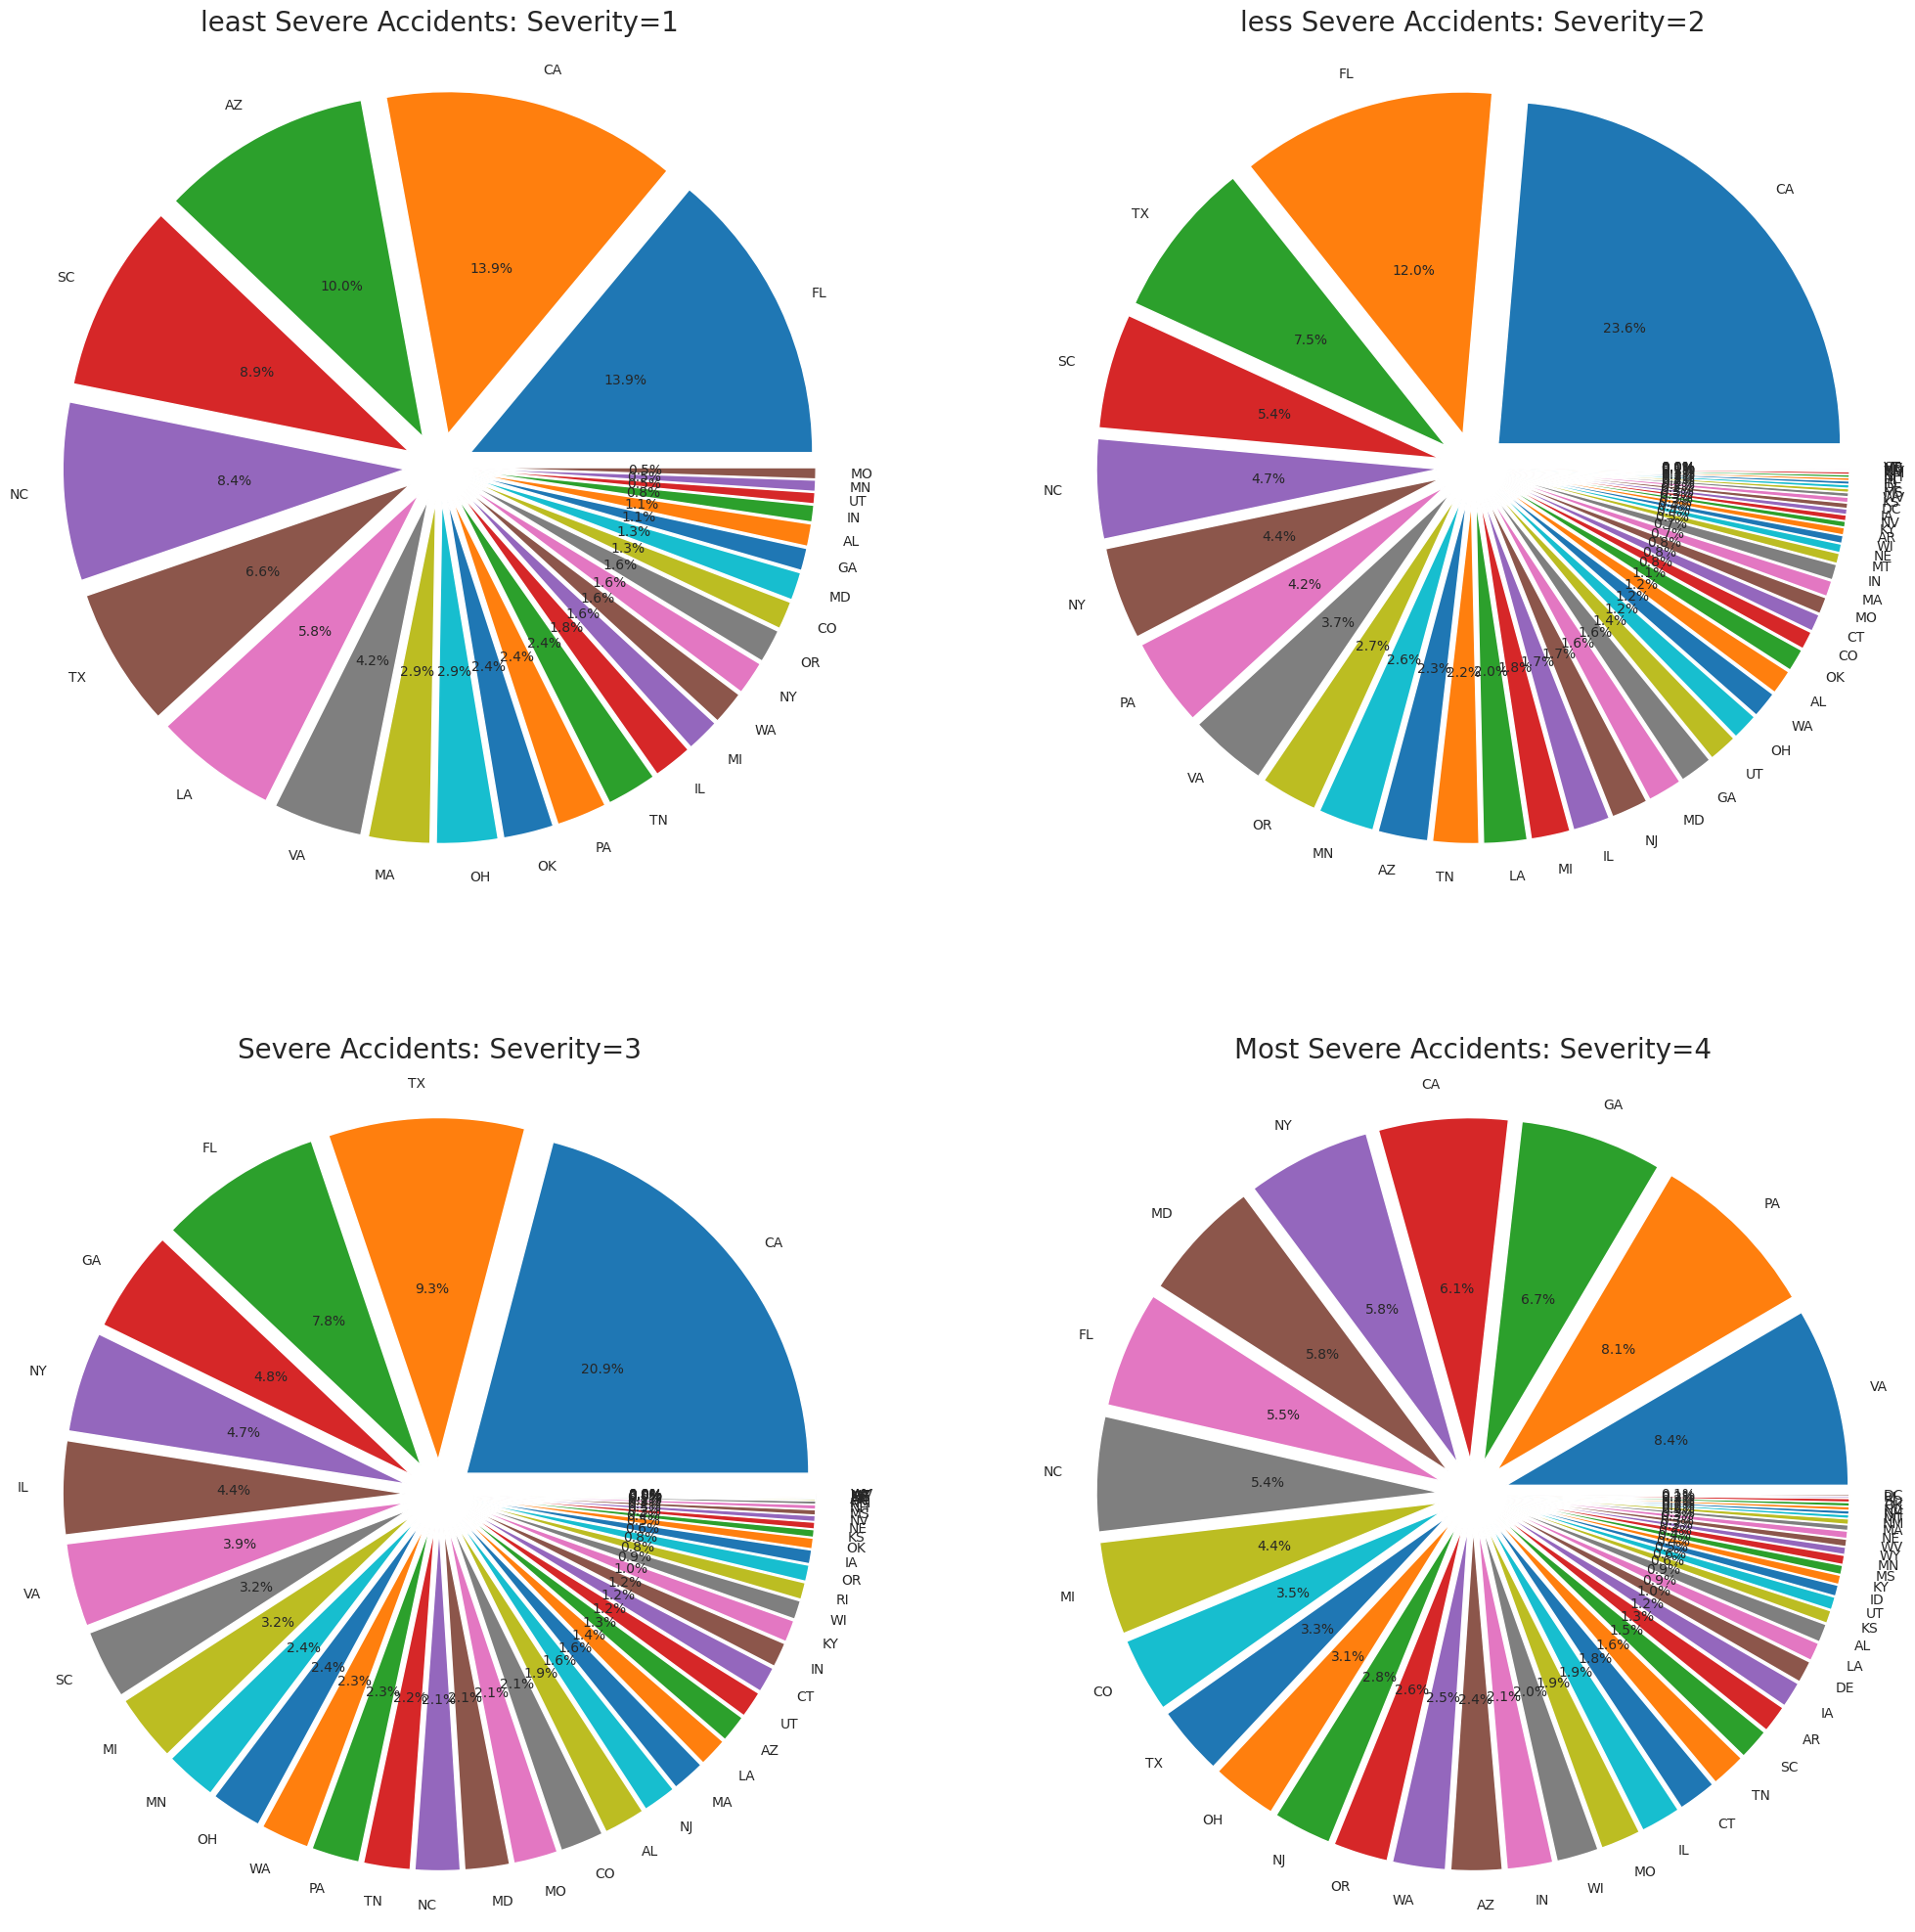

In [ ]:
fig, ax1 = plt.subplots(figsize=[25,25])
ax1 = plt.subplot2grid((2,2),(0,0))
labels = severe_accidents_1.keys()
plt.pie(x=severe_accidents_1, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_1), labels=labels, pctdistance=0.5)
plt.title("least Severe Accidents: Severity=1", fontsize=20)

ax1 = plt.subplot2grid((2,2),(0,1))
labels = severe_accidents_2.keys()
plt.pie(x=severe_accidents_2, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_2), labels=labels, pctdistance=0.5)
plt.title("less Severe Accidents: Severity=2", fontsize=20)

ax1 = plt.subplot2grid((2,2),(1,0))
labels = severe_accidents_3.keys()
plt.pie(x=severe_accidents_3, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_3), labels=labels, pctdistance=0.5)
plt.title("Severe Accidents: Severity=3", fontsize=20)

ax1 = plt.subplot2grid((2,2),(1,1))
labels = severe_accidents_4.keys()
plt.pie(x=severe_accidents_4, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_4), labels=labels, pctdistance=0.5)
plt.title("Most Severe Accidents: Severity=4", fontsize=20)

**Inferences from the above plot**
- California generally seems to have the most accidents (in all categories)

In [ ]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(30.641211, -91.153481),
 (38.990562, -77.39907),
 (34.66118932, -120.49282193),
 (43.680592, -92.993317),
 (35.395484, -118.985176),
 (42.532082, -70.94426700000002),
 (42.42128, -123.11945),
 (30.19101, -85.682508),
 (32.868947, -96.804018),
 (39.717217683602726, -86.1246907706922),
 (39.93346, -86.157433),
 (47.258259057773294, -115.05291581099009),
 (34.72015, -86.616592),
 (32.771645, -117.161407),
 (33.436073, -111.926163),
 (25.89866, -80.382801),
 (38.132332, -77.511383),
 (29.75239, -95.364708),
 (41.926895, -73.912605),
 (25.794969, -80.258877),
 (35.753944, -78.635696),
 (34.243271, -118.424461),
 (34.651295000000005, -86.816582),
 (34.03714, -81.090858),
 (28.64042401300125, -81.42232775649347),
 (39.16133523, -94.81736541),
 (35.19002000000001, -80.79835),
 (33.120965000000005, -117.32149),
 (42.442745, -83.754082),
 (30.452003, -91.102585),
 (39.711113, -104.99913),
 (38.654133, -121.382942),
 (30.5084002, -91.17196441),
 (38.087915, -122.231751),
 (33.968791, -84.526941

In [ ]:
import random

In [ ]:
df_sample = df.sample(10000)

In [ ]:
df_sample.Start_Lat

32573    38.660875
546      29.659439
17957    34.558838
25709    28.387188
13997    38.679098
           ...    
10978    35.216381
25564    37.542413
39595    38.882119
26804    31.811846
40678    38.341452
Name: Start_Lat, Length: 10000, dtype: float64

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df['Visibility(mi)']

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
45229    10.0
45230     9.0
45231    10.0
45232    10.0
45233     NaN
Name: Visibility(mi), Length: 45234, dtype: float64

In [ ]:
df['Visibility(mi)'].value_counts()

Visibility(mi)
10.00     35429
7.00       1296
9.00       1119
8.00        891
5.00        798
2.00        788
6.00        743
4.00        701
3.00        682
1.00        548
0.50        230
0.25        165
0.75        135
2.50        115
1.50         74
13.00        69
0.20         69
0.00         53
1.80         50
0.80         48
15.00        41
1.20         37
20.00        27
50.00        19
30.00        19
0.12         11
40.00         7
0.38          5
45.00         4
25.00         4
0.10          3
80.00         3
75.00         2
12.00         2
0.06          2
70.00         2
120.00        1
35.00         1
0.19          1
0.40          1
2.20          1
0.63          1
0.60          1
Name: count, dtype: int64

In [ ]:
df[(df.Severity == 4) & (df['Visibility(mi)'] <=10)]  # data when severity is high and visibility is moderate

ID   Source  Severity          Start_Time  \
91     A-7674438  Source1         4 2017-10-23 01:09:23   
152    A-7490180  Source1         4 2018-12-25 20:32:30   
165    A-1855153  Source2         4 2019-09-30 12:42:56   
175    A-7253427  Source1         4 2020-02-07 10:05:24   
197    A-3566804  Source1         4 2017-02-14 01:08:32   
...          ...      ...       ...                 ...   
45135  A-7403824  Source1         4 2019-09-01 02:33:18   
45144  A-3582217  Source1         4 2017-03-21 14:43:31   
45147  A-4132039  Source1         4 2022-08-28 08:30:00   
45200  A-3578565  Source1         4 2017-03-10 17:13:05   
45223  A-5436348  Source1         4 2023-01-20 06:11:00   

                         End_Time  Start_Lat   Start_Lng    End_Lat  \
91            2017-10-23 07:09:23  40.861739  -73.804528  40.864590   
152           2018-12-25 21:01:53  39.139480  -76.615400  39.139850   
165           2019-09-30 14:04:24  40.407188 -104.992989        NaN   
175           2020-02-07 10:34:51  25.788340  -80.208310  25.788570   
197           2017-02-14 08:05:49  30.036789  -95.851984  30.065380   
...                           ...        ...         ...        ...   
45135         2019-09-01 03:02:23  40.781500 -111.910000  40.782380   
45144         2017-03-21 20:43:31  35.843939  -78.834839  35.839475   
45147         2022-08-28 09:49:28  39.735105  -75.564070  39.735888   
45200         2017-03-10 23:13:55  40.884401  -77.505184  40.873999   
45223  2023-01-20 06:41:00.000000  31.784984  -84.849858  31.791287   

          End_Lng  Distance(mi)  ... Roundabout Station   Stop  \
91     -73.813720         0.519  ...      False   False  False   
152    -76.621930         0.351  ...      False   False  False   
165           NaN         3.250  ...      False   False  False   
175    -80.207270         0.067  ...      False   False  False   
197    -95.913800         4.192  ...      False   False  False   
...           ...           ...  ...        ...     ...    ...   
45135 -111.908890         0.084  ...      False   False  False   
45144  -78.831439         0.362  ...      False   False  False   
45147  -75.563291         0.068  ...      False   False   True   
45200  -77.536093         1.767  ...      False   False  False   
45223  -84.851034         0.441  ...      False   False  False   

      Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
91              False          False        False          Night   
152             False          False        False          Night   
165             False          False        False            Day   
175             False          False        False            Day   
197             False          False        False          Night   
...               ...            ...          ...            ...   
45135           False          False        False          Night   
45144           False          False        False            Day   
45147           False          False        False            Day   
45200           False          False        False            Day   
45223           False          False        False          Night   

      Civil_Twilight Nautical_Twilight Astronomical_Twilight  
91             Night             Night                 Night  
152            Night             Night                 Night  
165              Day               Day                   Day  
175              Day               Day                   Day  
197            Night             Night                 Night  
...              ...               ...                   ...  
45135          Night             Night                 Night  
45144            Day               Day                   Day  
45147            Day               Day                   Day  
45200            Day               Day                   Day  
45223          Night             Night                 Night  

[1117 rows x 46 columns]

In [ ]:
(len(df[df['Visibility(mi)'] <=2]) / len(df) )* 100. # total percentage of accidents in which visibility was less than 2 miles

4.912234160145024

In [ ]:
(len(df[(df['Visibility(mi)'] <=2) & (df['Severity'] ==4)]) / len(df) ) * 100. # total percentage of accidents in which visibility was less than 2 miles and severity was very high

0.13264358668258389

In [ ]:
weather = df.Weather_Condition.value_counts()

In [ ]:
weather[weather > 1000]  # Kind of weather when no. of accidents were greater than 1000

Weather_Condition
Fair                14901
Mostly Cloudy        5866
Cloudy               4849
Clear                4778
Partly Cloudy        4099
Overcast             2254
Light Rain           2083
Scattered Clouds     1171
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

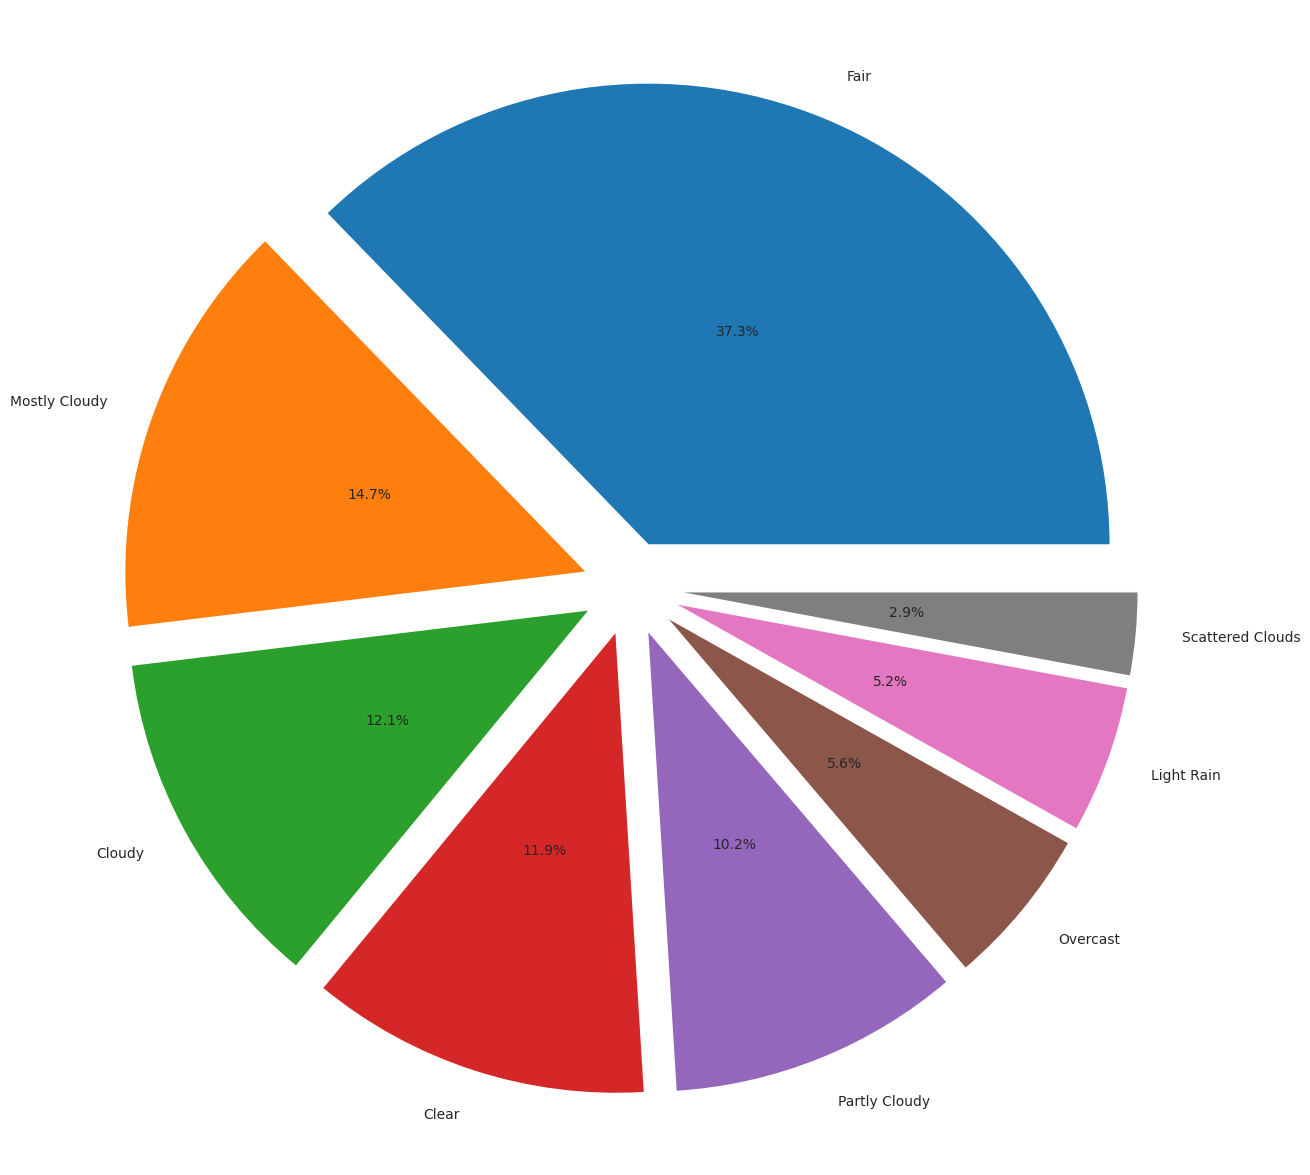

In [ ]:
pie, ax = plt.subplots(figsize=[15,15])
labels = weather[weather > 1000].keys()
plt.pie(x=weather[weather > 1000], autopct="%.1f%%", explode=[0.1]*len(weather[weather > 1000]), labels=labels, pctdistance=0.5)
plt.show();

In [ ]:
df['Temperature(F)']

0        77.0
1        45.0
2        68.0
3        27.0
4        42.0
         ... 
45229    37.0
45230    75.2
45231    54.0
45232    19.9
45233     NaN
Name: Temperature(F), Length: 45234, dtype: float64

In [ ]:
df['Temperature(F)'].value_counts()

Temperature(F)
 73.0    1017
 68.0     987
 77.0     985
 75.0     956
 70.0     930
         ... 
 96.3       1
 47.7       1
 74.3       1
-12.0       1
 66.4       1
Name: count, Length: 515, dtype: int64

In [ ]:
temperature = df['Temperature(F)'].value_counts()

In [ ]:
temperature.index

Index([ 73.0,  68.0,  77.0,  75.0,  70.0,  64.0,  72.0,  63.0,  54.0,  59.0,
       ...
        91.2,   2.1,  22.3,  76.3,  77.4,  96.3,  47.7,  74.3, -12.0,  66.4],
      dtype='float64', name='Temperature(F)', length=515)

In [ ]:
temperature.values

array([1017,  987,  985,  956,  930,  925,  914,  892,  868,  843,  842,
        831,  820,  796,  778,  763,  732,  684,  645,  641,  622,  616,
        590,  573,  571,  567,  554,  554,  551,  528,  521,  521,  490,
        475,  471,  469,  466,  453,  448,  423,  422,  418,  407,  399,
        396,  386,  384,  353,  347,  346,  334,  312,  312,  299,  293,
        272,  254,  250,  238,  216,  212,  208,  206,  200,  200,  196,
        194,  191,  190,  190,  189,  186,  184,  184,  173,  168,  168,
        160,  151,  146,  142,  137,  136,  132,  129,  129,  129,  129,
        124,  124,  121,  118,  112,  108,  103,   95,   92,   90,   89,
         88,   88,   88,   87,   86,   86,   85,   84,   83,   83,   80,
         78,   78,   77,   77,   76,   75,   75,   71,   68,   68,   63,
         62,   60,   60,   59,   58,   57,   56,   53,   53,   48,   47,
         46,   45,   44,   42,   40,   39,   37,   36,   35,   35,   35,
         33,   32,   32,   32,   30,   28,   27,   

In [ ]:
import seaborn as sns

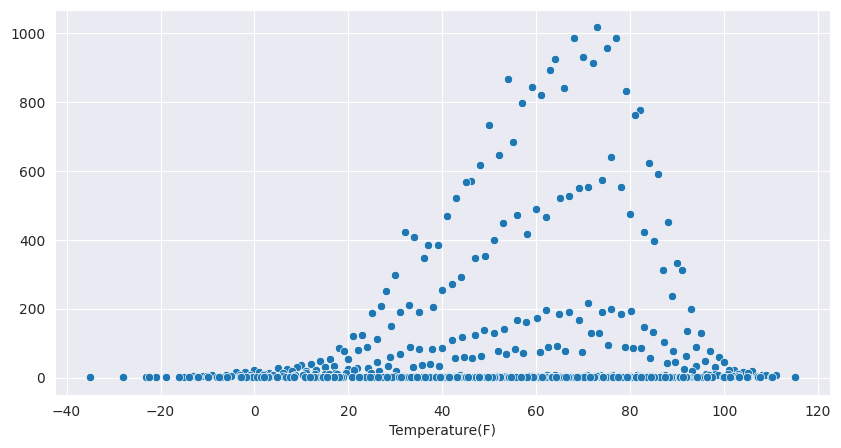

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=temperature.index, y=temperature.values)
plt.show();

In [ ]:
df.Sunrise_Sunset.value_counts()

Sunrise_Sunset
Day      31260
Night    13841
Name: count, dtype: int64

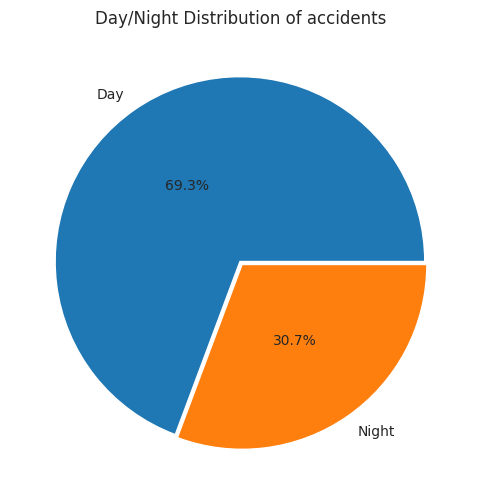

In [ ]:
pie, ax = plt.subplots(figsize=[6,6])
labels = df.Sunrise_Sunset.value_counts().keys()
plt.pie(x=df.Sunrise_Sunset.value_counts(), autopct="%.1f%%", explode=[0.01]*len(df.Sunrise_Sunset.value_counts()), labels=labels, pctdistance=0.5)
plt.title("Day/Night Distribution of accidents")
plt.show();

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
amenity = df.Amenity.groupby(df.Severity).value_counts()
amenity

Severity  Amenity
1         False        374
          True           6
2         False      35539
          True         549
3         False       7571
          True          31
4         False       1151
          True          12
Name: count, dtype: int64

In [ ]:
amenity.index

MultiIndex([(1, False),
            (1,  True),
            (2, False),
            (2,  True),
            (3, False),
            (3,  True),
            (4, False),
            (4,  True)],
           names=['Severity', 'Amenity'])

In [ ]:
no_exit = df.No_Exit.groupby(df.Severity).value_counts()
no_exit

Severity  No_Exit
1         False        377
          True           3
2         False      35983
          True         105
3         False       7591
          True          11
4         False       1159
          True           4
Name: count, dtype: int64

In [ ]:
railway = df.Railway.groupby(df.Severity).value_counts()
railway

Severity  Railway
1         False        375
          True           5
2         False      35765
          True         323
3         False       7551
          True          51
4         False       1152
          True          11
Name: count, dtype: int64

In [ ]:
railway = df.Railway.groupby(df.Severity).value_counts()
railway

Severity  Railway
1         False        375
          True           5
2         False      35765
          True         323
3         False       7551
          True          51
4         False       1152
          True          11
Name: count, dtype: int64

In [ ]:
stop = df.Stop.groupby(df.Severity).value_counts()
stop

Severity  Stop 
1         False      362
          True        18
2         False    34893
          True      1195
3         False     7549
          True        53
4         False     1131
          True        32
Name: count, dtype: int64

In [ ]:
traffic_signal = df.Traffic_Signal.groupby(df.Severity).value_counts()
traffic_signal

Severity  Traffic_Signal
1         False               240
          True                140
2         False             30285
          True               5803
3         False              7055
          True                547
4         False              1046
          True                117
Name: count, dtype: int64

In [ ]:
give_way = df.Give_Way.groupby(df.Severity).value_counts()
give_way

Severity  Give_Way
1         False         377
          True            3
2         False       35908
          True          180
3         False        7563
          True           39
4         False        1159
          True            4
Name: count, dtype: int64

In [ ]:
bump = df.Bump.groupby(df.Severity).value_counts()
bump

Severity  Bump 
1         False      380
2         False    36076
          True        12
3         False     7600
          True         2
4         False     1163
Name: count, dtype: int64

In [ ]:
crossing = df.Crossing.groupby(df.Severity).value_counts()
crossing

Severity  Crossing
1         False         276
          True          104
2         False       31528
          True         4560
3         False        7309
          True          293
4         False        1080
          True           83
Name: count, dtype: int64

In [ ]:
df.Turning_Loop.value_counts()

Turning_Loop
False    45233
Name: count, dtype: int64

Plotting all the values

<Axes: title={'center': 'Railway'}, xlabel='Severity'>

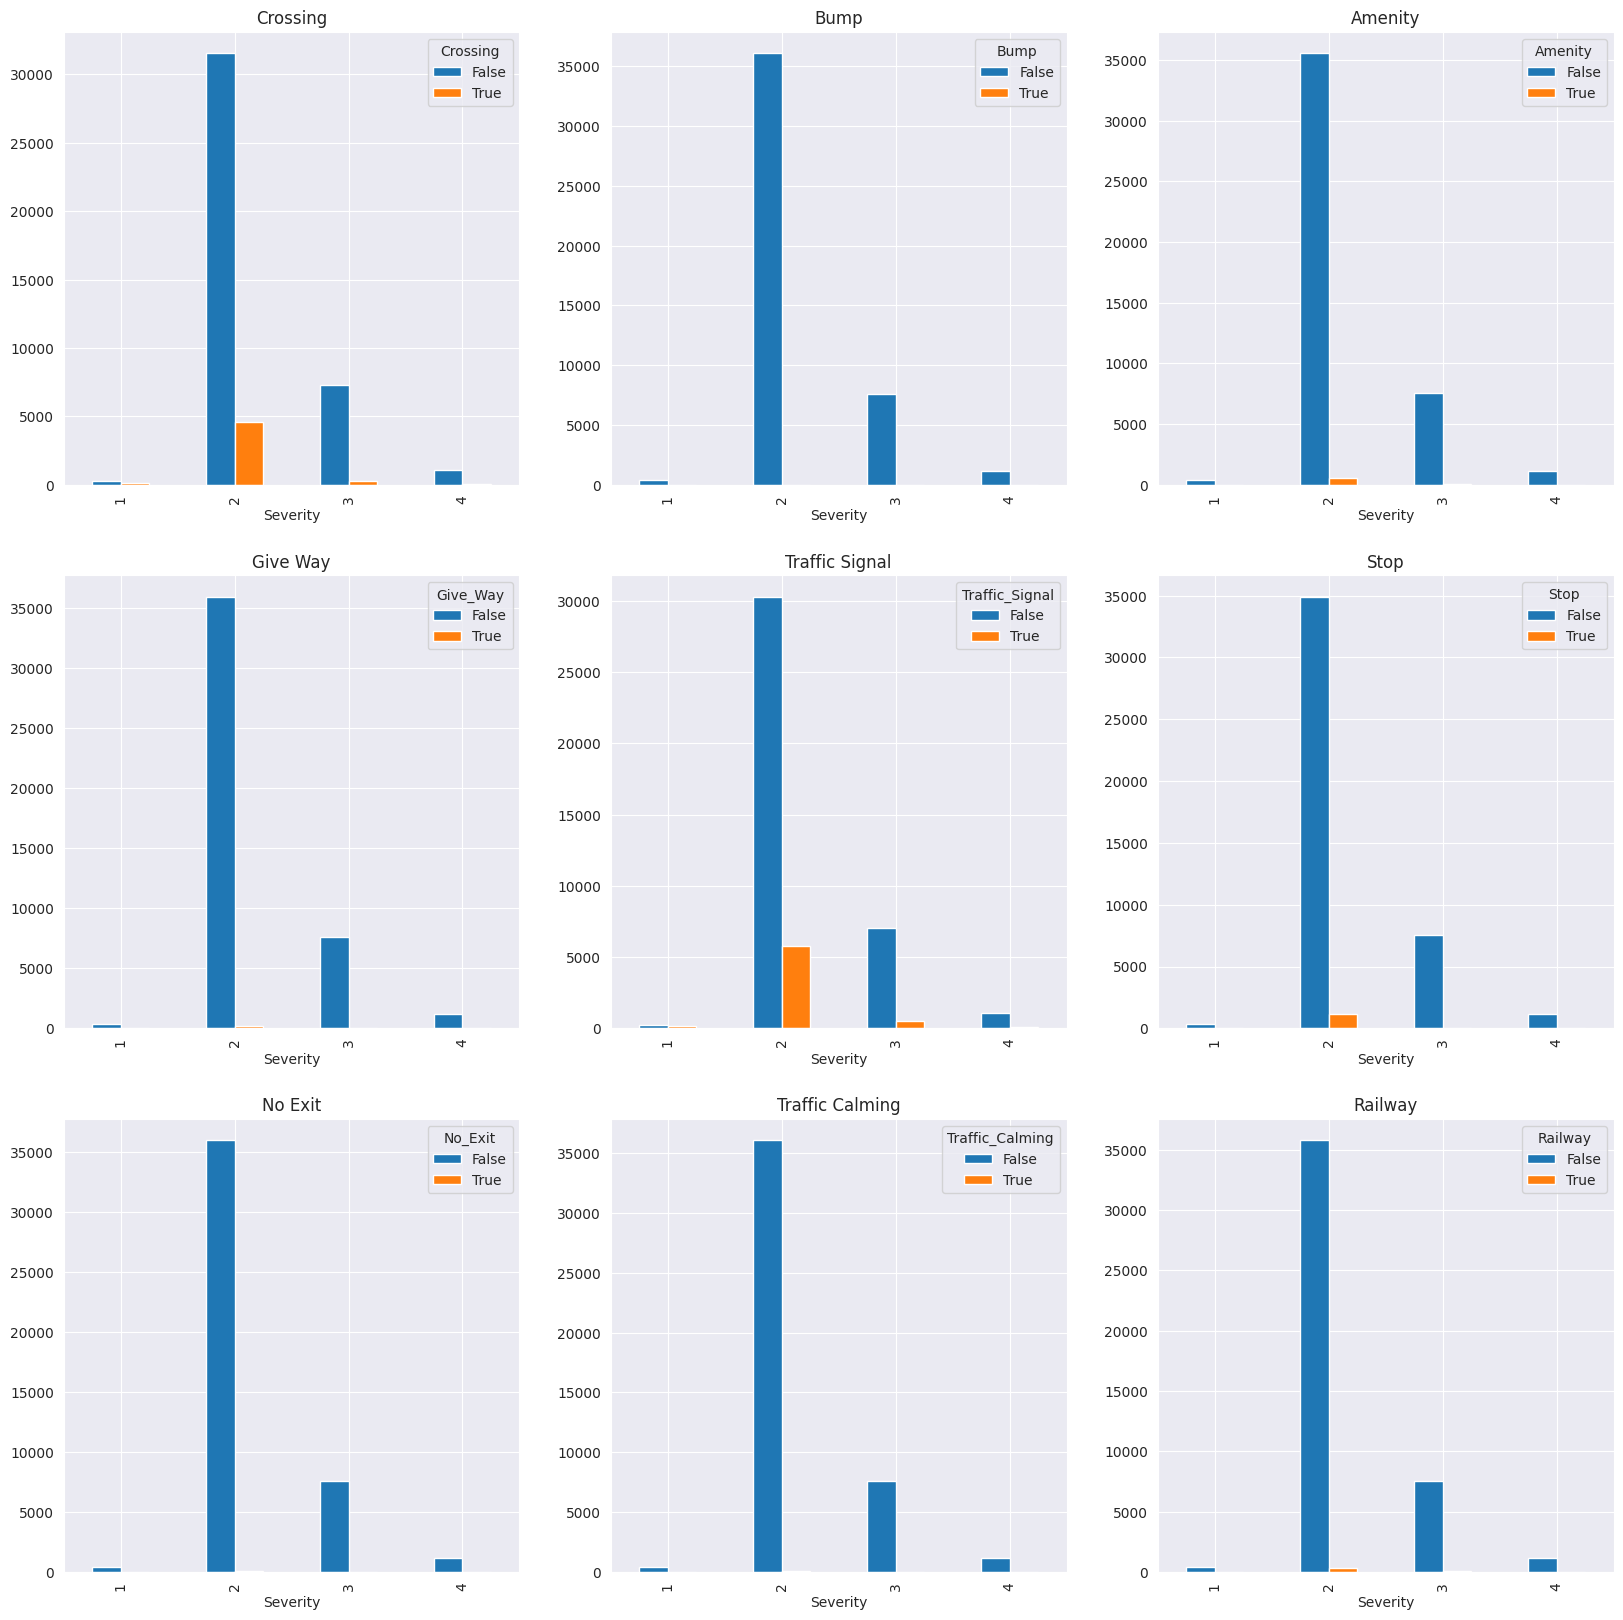

In [ ]:
traffic_calming = df.Traffic_Calming.groupby(df.Severity).value_counts()

fig, ax = plt.subplots(3,3, figsize=(20, 20))

crossing.unstack().plot(kind='bar', ax=ax[0,0], title="Crossing")
bump.unstack().plot(kind='bar', ax=ax[0,1], title="Bump")
amenity.unstack().plot(kind='bar', ax=ax[0,2], title="Amenity")
give_way.unstack().plot(kind='bar', ax=ax[1,0], title="Give Way")
traffic_signal.unstack().plot(kind='bar', ax=ax[1,1], title="Traffic Signal")
stop.unstack().plot(kind='bar', ax=ax[1,2], title="Stop")
no_exit.unstack().plot(kind='bar', ax=ax[2,0], title="No Exit")
traffic_calming.unstack().plot(kind='bar', ax=ax[2,1], title="Traffic Calming") # Now traffic_calming is defined
railway.unstack().plot(kind='bar', ax=ax[2,2], title="Railway")